In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Memuat dataset dari file Excel
data = pd.read_excel('Date_Fruit_Datasets.xlsx')

# Menampilkan informasi dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [3]:
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


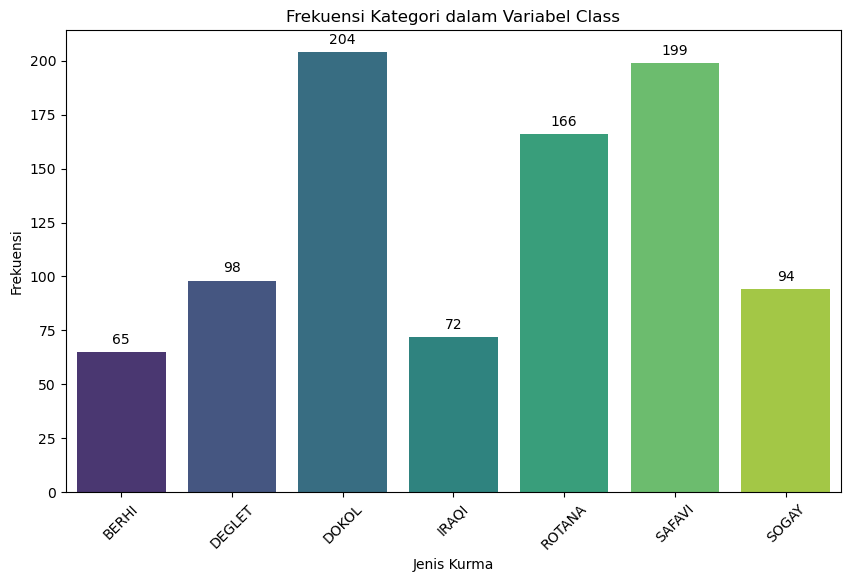

In [4]:
# Membuat barplot untuk variabel Class dengan label jumlah
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=data, x='Class', palette='viridis')

# Menambahkan label jumlah pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.title('Frekuensi Kategori dalam Variabel Class')
plt.xlabel('Jenis Kurma')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

In [5]:
#statistika deskriptif
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [6]:
# Mengecek jumlah missing values di setiap variabel
missing_values = data.isnull().sum()
print("Jumlah Missing Values di Setiap Variabel:")
print(missing_values)

Jumlah Missing Values di Setiap Variabel:
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


Dataset ini sudah Clear dari Permasalahan Missing Value, jadi tidak perlu dilakukan imputasi/penghapusan Variabel.

In [7]:
def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.select_dtypes(include=[np.number]).columns:  # Hanya untuk kolom numerik
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers

outliers = detect_outliers(data)

# Menampilkan jumlah outliers di setiap variabel
outlier_counts = outliers.sum()
print("Jumlah Outliers di Setiap Variabel:")
print(outlier_counts)

Jumlah Outliers di Setiap Variabel:
AREA               0
PERIMETER          0
MAJOR_AXIS         1
MINOR_AXIS         1
ECCENTRICITY      19
EQDIASQ            1
SOLIDITY          58
CONVEX_AREA        0
EXTENT            13
ASPECT_RATIO      12
ROUNDNESS         35
COMPACTNESS        1
SHAPEFACTOR_1      5
SHAPEFACTOR_2     18
SHAPEFACTOR_3      3
SHAPEFACTOR_4     67
MeanRR             0
MeanRG             0
MeanRB             0
StdDevRR           3
StdDevRG          10
StdDevRB           4
SkewRR            57
SkewRG             0
SkewRB            26
KurtosisRR       130
KurtosisRG        22
KurtosisRB        66
EntropyRR         11
EntropyRG         14
EntropyRB         25
ALLdaub4RR         0
ALLdaub4RG         0
ALLdaub4RB         0
Class              0
dtype: object


Terlihat dalam dataset ini bahwa terdapat beberapa masalah Outlier di beberapa Variabel Prediktornya. Supaya Lebih jelas, maka kita akan membentuk Visualisasi Boxplotnya.

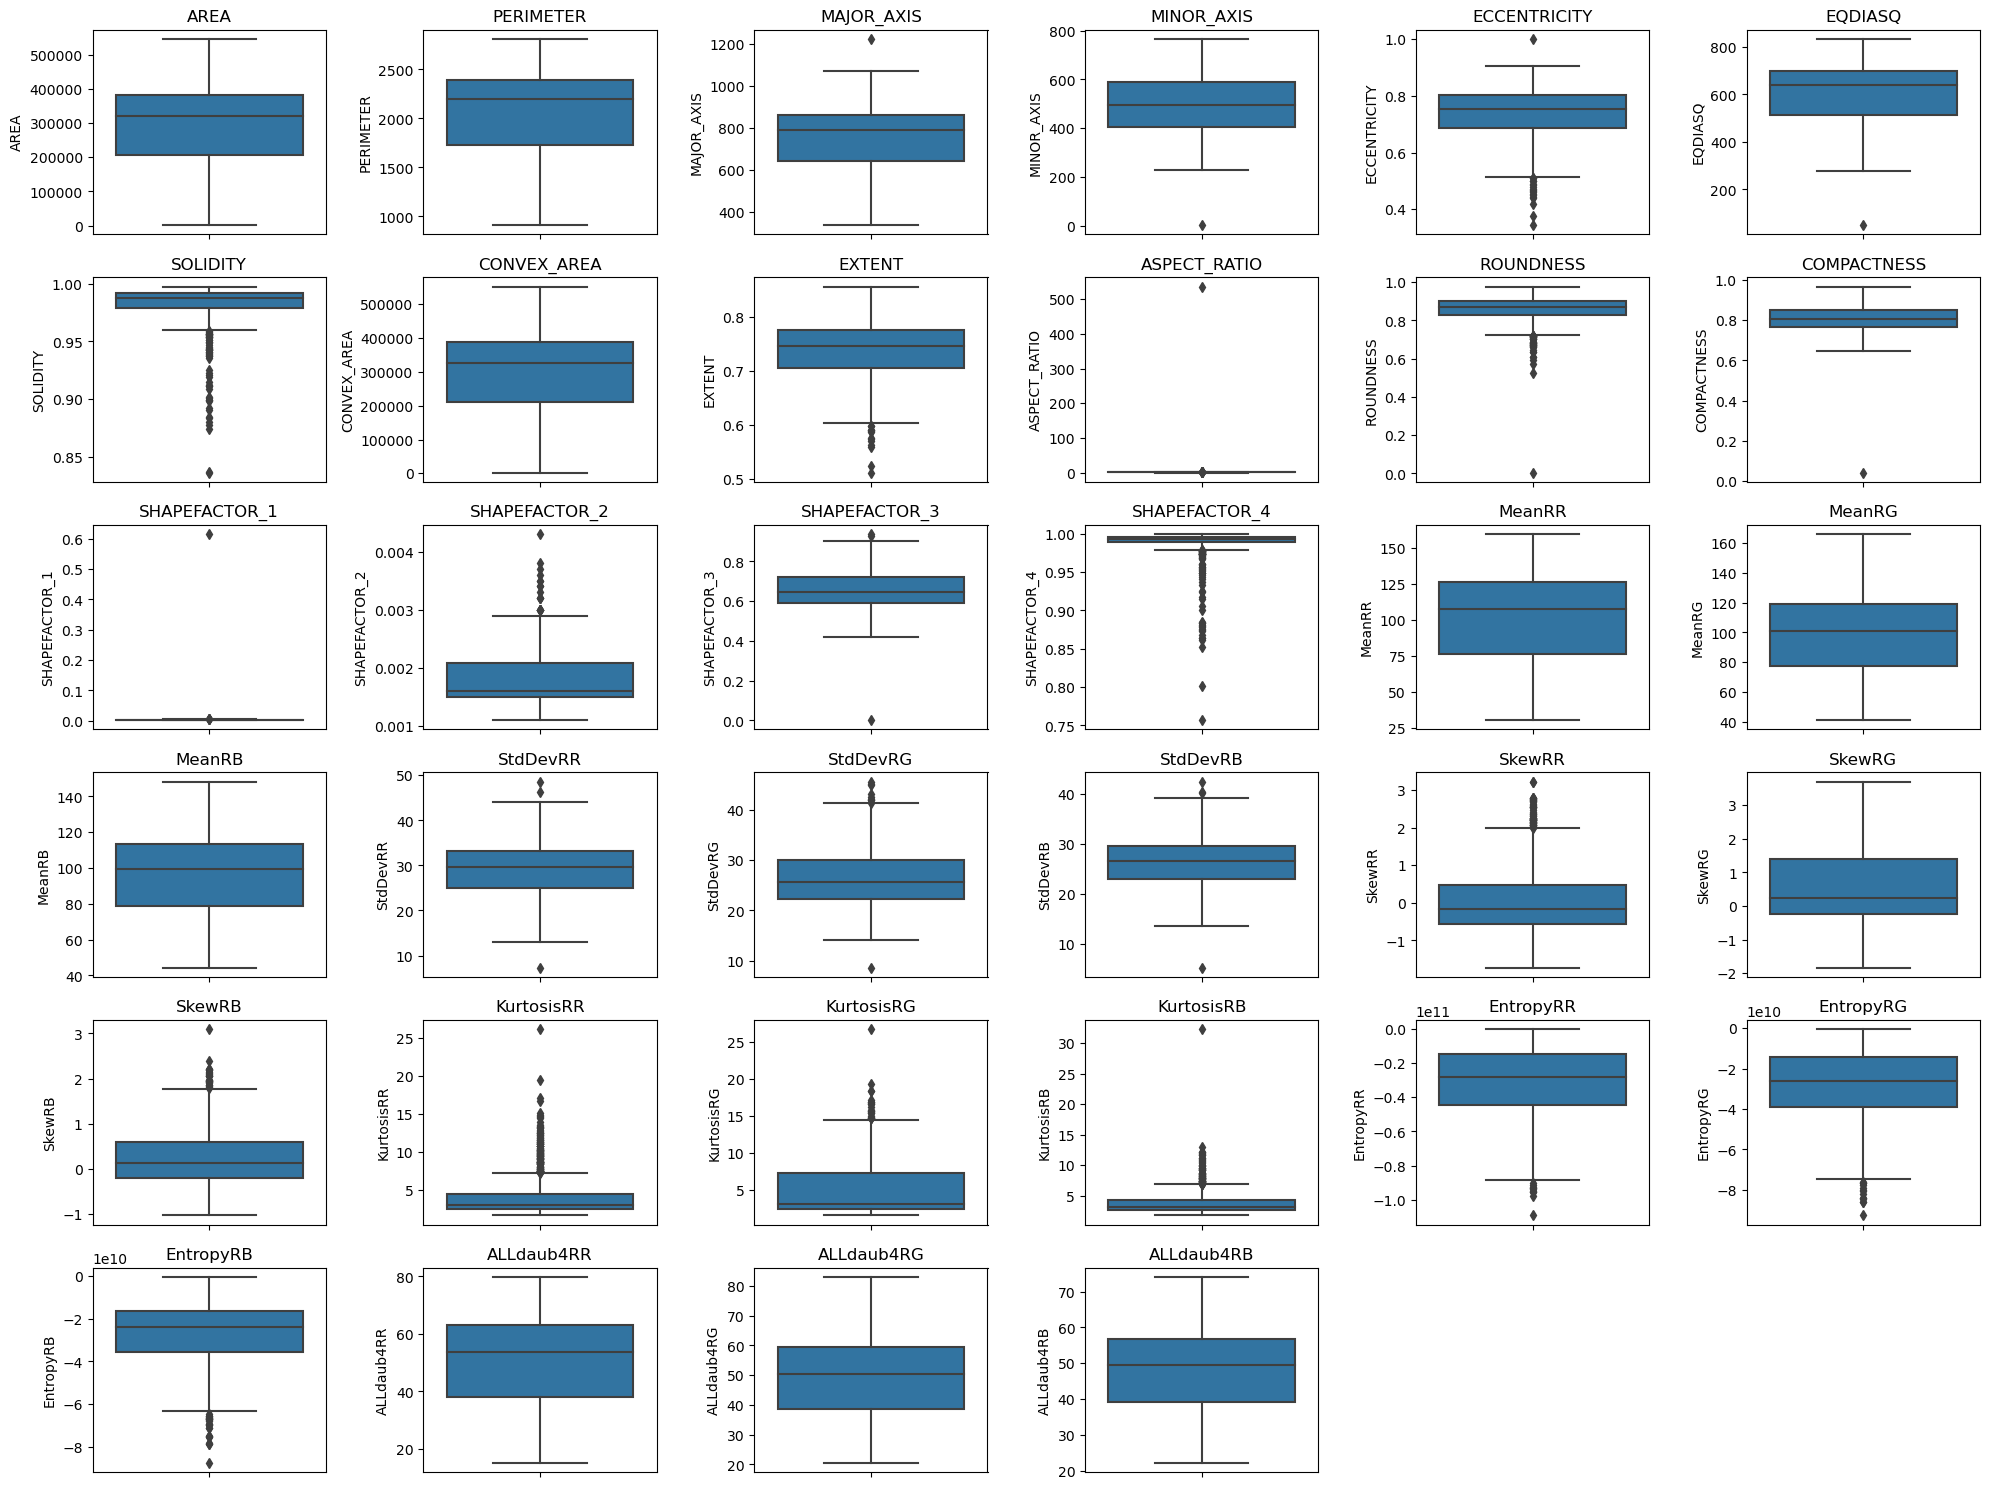

In [8]:
# Membuat boxplot untuk setiap kolom numerik dalam dataset
numerical_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))  # Menentukan ukuran figure
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 6, i)  # Menentukan grid layout
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
plt.show()

In [9]:
# Memisahkan fitur (X) dan label (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [11]:
y

0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object

In [12]:
X_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
880,364338,2385.5110,849.6287,548.4377,0.7638,681.0944,0.9874,368969,0.7596,1.5492,...,0.3835,2.5413,2.7010,4.7956,-45702238208,-31309285376,-31791349760,54.5422,46.1706,47.5687
740,343379,2360.4670,919.1130,479.2314,0.8533,661.2138,0.9657,355591,0.6926,1.9179,...,0.8084,13.2536,10.8915,5.0327,-6173152768,-10177111040,-13946608640,20.5354,27.7553,33.2095
231,80044,1059.0460,378.1419,270.6614,0.6983,319.2416,0.9883,80990,0.7521,1.3971,...,-0.1599,2.2247,2.4509,2.2165,-9834114048,-9082079232,-8377428480,54.3915,53.0591,50.5000
388,394009,2279.7581,770.8477,654.0494,0.5292,708.2852,0.9945,396190,0.7632,1.1786,...,1.6654,5.7796,9.1424,7.8056,-18411845632,-23242752000,-23591233536,34.5177,38.9835,38.4695
118,242874,1843.9160,647.9982,479.8817,0.6720,556.0906,0.9906,245181,0.7818,1.3503,...,-0.3694,2.4534,2.2759,2.5079,-46650236928,-40748339200,-32199612416,66.5225,62.6833,56.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,169573,1548.9830,594.8965,364.4516,0.7904,464.6580,0.9932,170738,0.8245,1.6323,...,-0.6257,2.4879,2.1186,2.4125,-35847098368,-33293408256,-27052677120,69.5829,67.4267,61.7498
270,102142,1223.5020,441.7251,296.5040,0.7412,360.6262,0.9863,103559,0.7847,1.4898,...,-0.5385,3.7325,3.9749,3.0696,-20307597312,-20240594944,-18247018496,68.7153,69.4312,65.9034
860,212397,1773.1410,649.3710,418.6798,0.7644,520.0310,0.9773,217331,0.7605,1.5510,...,0.1680,2.8597,2.8887,3.0498,-21660262400,-16450807808,-15513940992,50.1400,43.9826,43.0455
435,441826,2486.4771,942.0581,603.1290,0.7682,750.0336,0.9948,444138,0.8075,1.5620,...,1.7484,7.9695,9.3755,7.3022,-36332118016,-32863416320,-37779701760,43.0456,41.0627,43.2121


In [13]:
# Mengonversi kembali array numpy ke DataFrame untuk konsistensi dengan fungsi detect_outliers
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [14]:
# Mengecek outlier pada data yang distandarisasi
outliers_train_scaled = detect_outliers(X_train_scaled_df)
outliers_test_scaled = detect_outliers(X_test_scaled_df)

# Menampilkan jumlah outlier di setiap variabel
outlier_counts_train_scaled = outliers_train_scaled.sum()
outlier_counts_test_scaled = outliers_test_scaled.sum()

print("Jumlah Outliers di Setiap Variabel pada Data Training yang Distandarisasi:")
print(outlier_counts_train_scaled)
print("\nJumlah Outliers di Setiap Variabel pada Data Testing yang Distandarisasi:")
print(outlier_counts_test_scaled)

Jumlah Outliers di Setiap Variabel pada Data Training yang Distandarisasi:
AREA              0
PERIMETER         0
MAJOR_AXIS        1
MINOR_AXIS        1
ECCENTRICITY     12
EQDIASQ           1
SOLIDITY         43
CONVEX_AREA       0
EXTENT           10
ASPECT_RATIO     11
ROUNDNESS        22
COMPACTNESS       1
SHAPEFACTOR_1     5
SHAPEFACTOR_2    25
SHAPEFACTOR_3     3
SHAPEFACTOR_4    53
MeanRR            0
MeanRG            0
MeanRB            0
StdDevRR          2
StdDevRG          9
StdDevRB          3
SkewRR           43
SkewRG            0
SkewRB           20
KurtosisRR       98
KurtosisRG       12
KurtosisRB       49
EntropyRR         8
EntropyRG         9
EntropyRB        21
ALLdaub4RR        0
ALLdaub4RG        0
ALLdaub4RB        0
dtype: int64

Jumlah Outliers di Setiap Variabel pada Data Testing yang Distandarisasi:
AREA              0
PERIMETER         0
MAJOR_AXIS        0
MINOR_AXIS        0
ECCENTRICITY      6
EQDIASQ           0
SOLIDITY         17
CONVEX_AREA      

In [15]:
X_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
880,364338,2385.5110,849.6287,548.4377,0.7638,681.0944,0.9874,368969,0.7596,1.5492,...,0.3835,2.5413,2.7010,4.7956,-45702238208,-31309285376,-31791349760,54.5422,46.1706,47.5687
740,343379,2360.4670,919.1130,479.2314,0.8533,661.2138,0.9657,355591,0.6926,1.9179,...,0.8084,13.2536,10.8915,5.0327,-6173152768,-10177111040,-13946608640,20.5354,27.7553,33.2095
231,80044,1059.0460,378.1419,270.6614,0.6983,319.2416,0.9883,80990,0.7521,1.3971,...,-0.1599,2.2247,2.4509,2.2165,-9834114048,-9082079232,-8377428480,54.3915,53.0591,50.5000
388,394009,2279.7581,770.8477,654.0494,0.5292,708.2852,0.9945,396190,0.7632,1.1786,...,1.6654,5.7796,9.1424,7.8056,-18411845632,-23242752000,-23591233536,34.5177,38.9835,38.4695
118,242874,1843.9160,647.9982,479.8817,0.6720,556.0906,0.9906,245181,0.7818,1.3503,...,-0.3694,2.4534,2.2759,2.5079,-46650236928,-40748339200,-32199612416,66.5225,62.6833,56.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,169573,1548.9830,594.8965,364.4516,0.7904,464.6580,0.9932,170738,0.8245,1.6323,...,-0.6257,2.4879,2.1186,2.4125,-35847098368,-33293408256,-27052677120,69.5829,67.4267,61.7498
270,102142,1223.5020,441.7251,296.5040,0.7412,360.6262,0.9863,103559,0.7847,1.4898,...,-0.5385,3.7325,3.9749,3.0696,-20307597312,-20240594944,-18247018496,68.7153,69.4312,65.9034
860,212397,1773.1410,649.3710,418.6798,0.7644,520.0310,0.9773,217331,0.7605,1.5510,...,0.1680,2.8597,2.8887,3.0498,-21660262400,-16450807808,-15513940992,50.1400,43.9826,43.0455
435,441826,2486.4771,942.0581,603.1290,0.7682,750.0336,0.9948,444138,0.8075,1.5620,...,1.7484,7.9695,9.3755,7.3022,-36332118016,-32863416320,-37779701760,43.0456,41.0627,43.2121


In [16]:
X_test

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
331,143957,1452.2620,523.1368,352.3305,0.7392,428.1259,0.9844,146236,0.7746,1.4848,...,-0.3565,4.1478,3.4278,2.4134,-36987568128,-34249711616,-23752157184,77.3446,75.2287,62.9057
638,260563,1975.3740,762.5055,437.8510,0.8187,575.9854,0.9871,263977,0.6648,1.7415,...,0.3581,7.7778,16.2644,3.6606,-2424508160,-4791147520,-8197618688,16.2304,22.3860,28.8860
326,154245,1503.5980,546.4366,361.8018,0.7494,443.1601,0.9883,156070,0.7420,1.5103,...,0.3657,2.4202,2.9624,3.0045,-14960579584,-14010061824,-14057613312,48.2049,46.8561,46.4054
848,317794,2280.9690,875.5868,525.3380,0.8000,636.1037,0.9016,352462,0.6484,1.6667,...,0.3719,2.2682,2.1522,2.9676,-47417053184,-39451316224,-33127270400,58.7696,54.0476,50.8977
39,402279,2295.8630,798.9365,643.2753,0.5931,715.6797,0.9936,404887,0.7867,1.2420,...,1.9477,5.5889,12.5304,9.9496,-30746945536,-32178810880,-35126345728,43.7705,45.6162,46.3010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,283770,2096.7639,775.8751,468.8516,0.7968,601.0883,0.9737,291436,0.6751,1.6548,...,0.8440,11.0456,12.1213,6.1299,-4560918528,-7281993216,-9060293632,20.5245,25.8721,29.4805
25,381508,2239.7891,734.2203,666.2502,0.4202,696.9584,0.9919,384642,0.7398,1.1020,...,2.0740,6.6729,10.5392,9.3474,-25635362816,-25228310528,-28113027072,41.0071,41.1774,41.5364
84,253276,1961.0400,740.2677,437.3487,0.8068,567.8741,0.9822,257864,0.7493,1.6926,...,-0.1425,2.0920,1.9879,2.1549,-45574098944,-41109114880,-35898662912,64.4454,61.4443,58.3921
10,364495,2216.4900,790.9014,590.7698,0.6649,681.2411,0.9949,366374,0.7658,1.3388,...,0.9283,3.0514,4.3653,6.0898,-41679380480,-40727969792,-37574615040,52.7269,52.9888,50.3108


In [17]:
X_test_scaled_df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,-1.468095,-1.510441,-1.610983,-1.273536,0.019873,-1.499562,0.147284,-1.478792,0.732754,-0.039987,...,-0.972539,-0.052789,-0.472489,-0.666781,-0.252934,-0.302594,0.264694,1.715690,1.886359,1.389864
1,-0.380784,-0.230432,0.050289,-0.528219,0.910994,-0.265407,0.295217,-0.395677,-1.323526,-0.027098,...,0.157208,1.182971,2.999615,-0.074741,1.416198,1.387928,1.299587,-2.076080,-1.838844,-1.747663
2,-1.372163,-1.384826,-1.449277,-1.190993,0.134206,-1.374074,0.360965,-1.388327,0.122237,-0.038707,...,0.169223,-0.640916,-0.598372,-0.386188,0.810802,0.858887,0.909703,-0.092254,-0.113798,-0.131905
3,0.152876,0.517333,0.835098,0.234235,0.701385,0.236389,-4.389327,0.418307,-1.630657,-0.030853,...,0.179025,-0.692661,-0.817519,-0.403705,-0.756599,-0.601096,-0.359063,0.563222,0.393174,0.282405
4,0.940669,0.553777,0.303128,1.262067,-1.617771,0.900595,0.651352,0.900572,0.959357,-0.052178,...,2.670286,0.437804,1.989625,2.910621,0.048440,-0.183753,-0.492068,-0.367382,-0.201206,-0.141534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.164387,0.066599,0.143077,-0.258047,0.665516,-0.055878,-0.438969,-0.143079,-1.130633,-0.031451,...,0.925392,2.295427,1.878970,1.097426,1.313026,1.244987,1.242191,-1.809657,-1.593088,-1.692834
176,0.746987,0.416569,-0.146016,1.462294,-3.555819,0.744332,0.558209,0.714335,0.081037,-0.059208,...,2.869960,0.806830,1.451036,2.624759,0.295291,0.215112,-0.025449,-0.538835,-0.514124,-0.580957
177,-0.448733,-0.265506,-0.104046,-0.532597,0.777606,-0.333110,0.026746,-0.451912,0.258948,-0.029553,...,-0.634215,-0.752645,-0.861960,-0.789490,-0.667598,-0.696231,-0.543452,0.915371,0.914613,0.973590
178,0.588346,0.359558,0.247363,0.804478,-0.812960,0.613143,0.722579,0.546286,0.567952,-0.047318,...,1.058666,-0.426037,-0.218909,1.078390,-0.479513,-0.674358,-0.654959,0.188309,0.318533,0.228277


In [18]:
y_train

880     SOGAY
740    SAFAVI
231     DOKOL
388     IRAQI
118    DEGLET
        ...  
106    DEGLET
270     DOKOL
860     SOGAY
435     IRAQI
102    DEGLET
Name: Class, Length: 718, dtype: object

In [19]:
y_test

331     DOKOL
638    SAFAVI
326     DOKOL
848     SOGAY
39      BERHI
        ...  
777    SAFAVI
25      BERHI
84     DEGLET
10      BERHI
332     DOKOL
Name: Class, Length: 180, dtype: object

# Analisis Model dengan dataset yang belum di standarisasi :

## Metode SVM

In [20]:
# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Memprediksi set pengujian
y_pred_svm = svm_model.predict(X_test)

# Evaluasi kinerja model SVM
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Model
Accuracy: 0.6333333333333333
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        12
      DEGLET       0.27      0.35      0.30        20
       DOKOL       0.62      0.82      0.71        50
       IRAQI       0.40      0.20      0.27        10
      ROTANA       0.81      0.83      0.82        35
      SAFAVI       0.79      1.00      0.88        33
       SOGAY       0.40      0.10      0.16        20

    accuracy                           0.63       180
   macro avg       0.47      0.47      0.45       180
weighted avg       0.57      0.63      0.58       180

Confusion Matrix:
 [[ 0  2  5  2  3  0  0]
 [ 0  7  7  1  2  0  3]
 [ 0  2 41  0  0  7  0]
 [ 0  1  5  2  0  2  0]
 [ 0  6  0  0 29  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  8  8  0  2  0  2]]


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict decision scores
y_decision_scores_svm = svm_model.decision_function(X_test)

# Calculate the AUC for each class
auc_svm = roc_auc_score(y_test_binarized, y_decision_scores_svm, average='macro')
print(f"Macro-Averaged AUC for SVM: {auc_svm:.4f}")

# Optionally, you can also calculate the AUC for each class separately
for i in range(y_test_binarized.shape[1]):
    auc_class = roc_auc_score(y_test_binarized[:, i], y_decision_scores_svm[:, i])
    print(f"AUC for class {i}: {auc_class:.4f}")

Macro-Averaged AUC for SVM: 0.8599
AUC for class 0: 0.6389
AUC for class 1: 0.7525
AUC for class 2: 0.9132
AUC for class 3: 0.8888
AUC for class 4: 0.9771
AUC for class 5: 0.9897
AUC for class 6: 0.8591


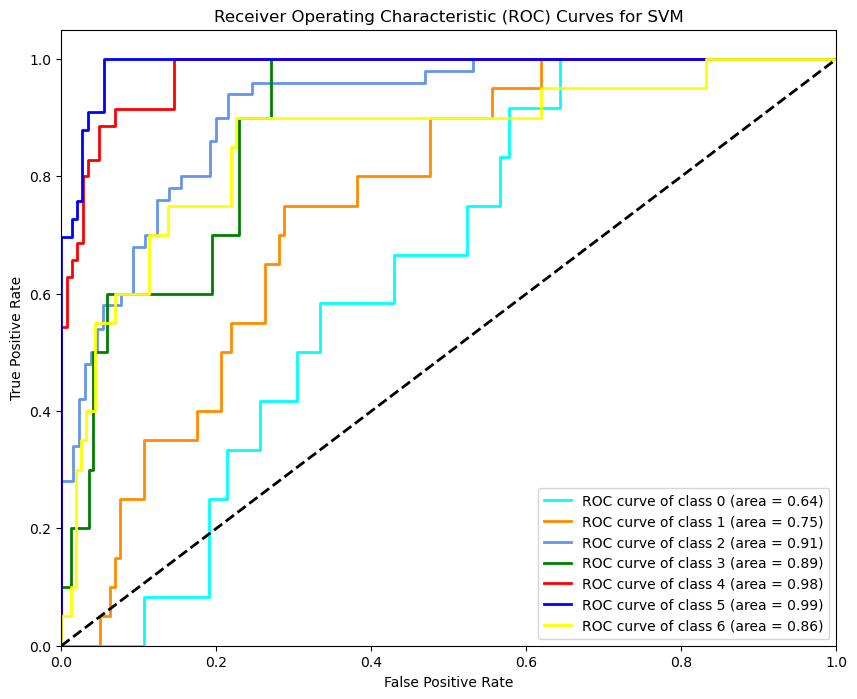

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def evaluate_and_visualize_auc(y_test, y_decision_scores, model_name):
    # Binarize the output labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_binarized.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

# Example usage for SVM
roc_auc_svm = evaluate_and_visualize_auc(y_test, y_decision_scores_svm, model_name="SVM")

## Metode KNN

In [23]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
knn_model.fit(X_train.values, y_train)

# Memprediksi set pengujian
y_pred_knn = knn_model.predict(X_test.values)

# Evaluasi kinerja model KNN
print("KNN Model")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Model
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        12
      DEGLET       0.40      0.40      0.40        20
       DOKOL       0.74      0.74      0.74        50
       IRAQI       0.36      0.50      0.42        10
      ROTANA       0.79      0.89      0.84        35
      SAFAVI       0.85      0.88      0.87        33
       SOGAY       0.47      0.35      0.40        20

    accuracy                           0.65       180
   macro avg       0.52      0.54      0.52       180
weighted avg       0.63      0.65      0.64       180

Confusion Matrix:
 [[ 0  0  4  4  3  0  1]
 [ 0  8  2  2  4  0  4]
 [ 2  3 37  1  0  4  3]
 [ 1  1  2  5  0  1  0]
 [ 1  2  0  1 31  0  0]
 [ 0  1  2  1  0 29  0]
 [ 4  5  3  0  1  0  7]]


In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Train the KNN model
knn_model.fit(X_train.values, y_train)

# Predict probabilities for each class
y_prob_knn = knn_model.predict_proba(X_test.values)

from sklearn.metrics import roc_auc_score

# Compute AUC for each class
auc_scores = {}
for i in range(n_classes):
    auc_scores[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_knn[:, i])

# Compute macro-averaged AUC
macro_avg_auc = sum(auc_scores.values()) / n_classes

# Print the results
print(f"Macro-Averaged AUC for KNN: {macro_avg_auc:.4f}")
for class_idx, auc_score in auc_scores.items():
    print(f"{class_idx}: {auc_score:.4f}")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob_knn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

Macro-Averaged AUC for KNN: 0.8156
AUC for class 0: 0.6205
AUC for class 1: 0.6706
AUC for class 2: 0.9083
AUC for class 3: 0.8235
AUC for class 4: 0.9683
AUC for class 5: 0.9786
AUC for class 6: 0.7395


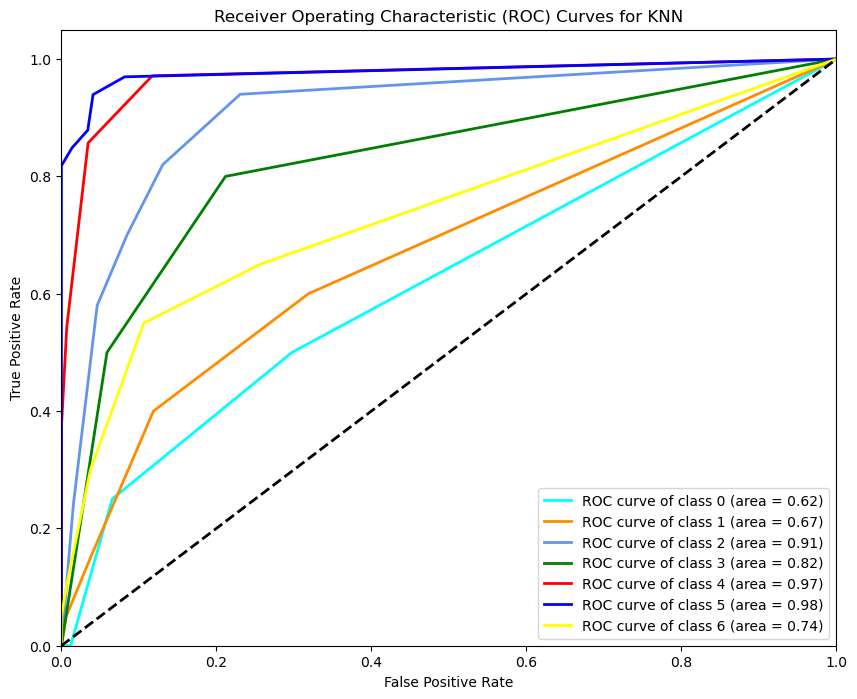

In [25]:
import matplotlib.pyplot as plt
from itertools import cycle

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for KNN')
plt.legend(loc="lower right")
plt.show()

## Metode Decision Tree

Decision Tree Model
Accuracy: 0.8777777777777778
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.60      0.50      0.55        12
      DEGLET       0.72      0.90      0.80        20
       DOKOL       0.98      0.92      0.95        50
       IRAQI       0.64      0.70      0.67        10
      ROTANA       0.94      0.91      0.93        35
      SAFAVI       0.97      0.97      0.97        33
       SOGAY       0.85      0.85      0.85        20

    accuracy                           0.88       180
   macro avg       0.81      0.82      0.82       180
weighted avg       0.88      0.88      0.88       180

Confusion Matrix:
 [[ 6  0  0  4  0  1  1]
 [ 0 18  1  0  1  0  0]
 [ 0  4 46  0  0  0  0]
 [ 2  0  0  7  1  0  0]
 [ 2  0  0  0 32  0  1]
 [ 0  0  0  0  0 32  1]
 [ 0  3  0  0  0  0 17]]


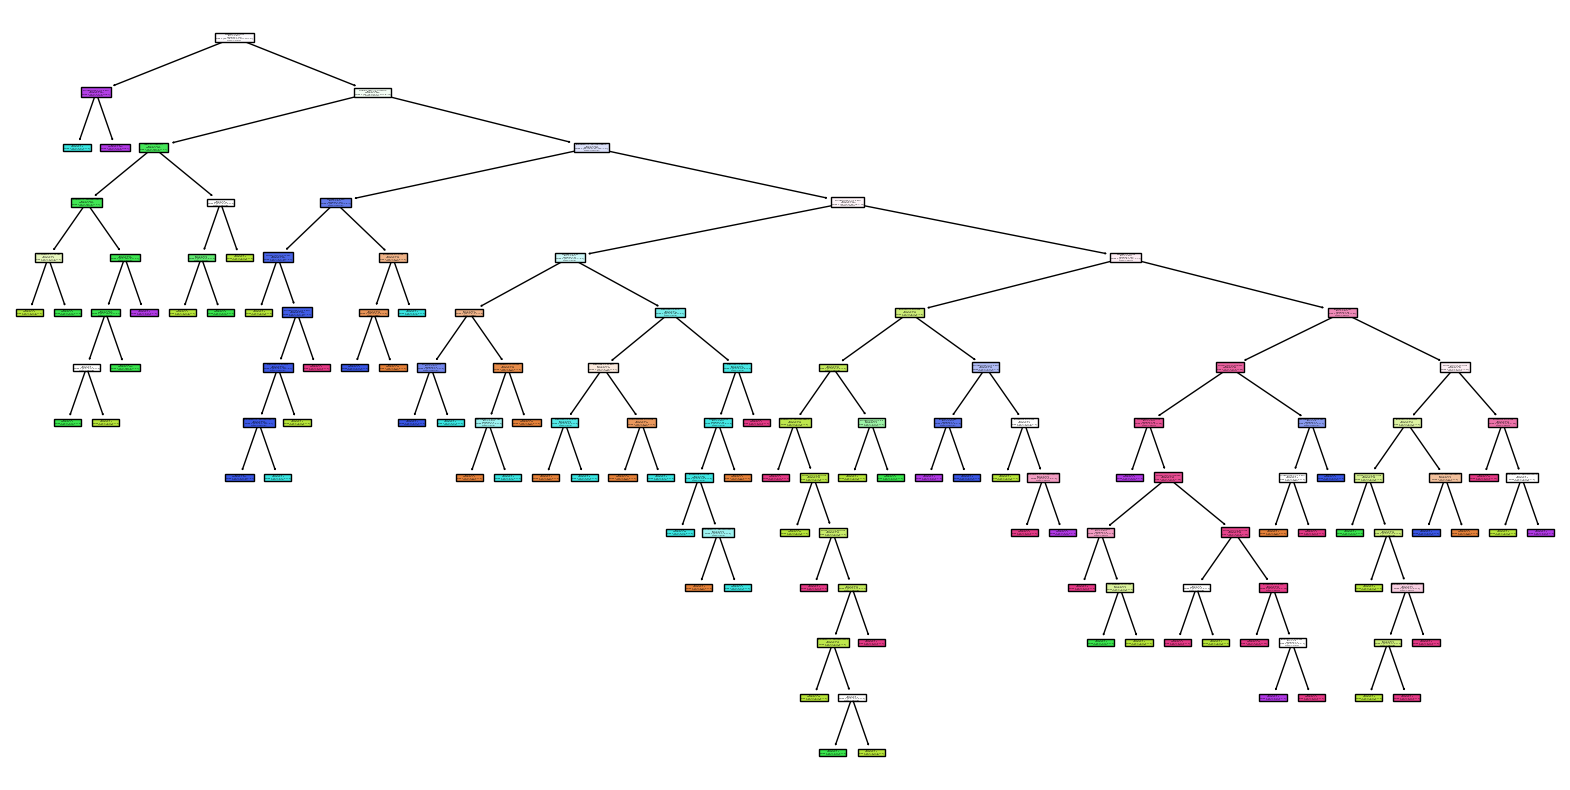

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree
dt_model.fit(X_train.values, y_train)

# Memprediksi set pengujian
y_pred_dt = dt_model.predict(X_test.values)

# Evaluasi kinerja model Decision Tree
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

nama=X_train.columns.tolist()
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=nama, class_names=[str(cls) for cls in dt_model.classes_])
plt.show()

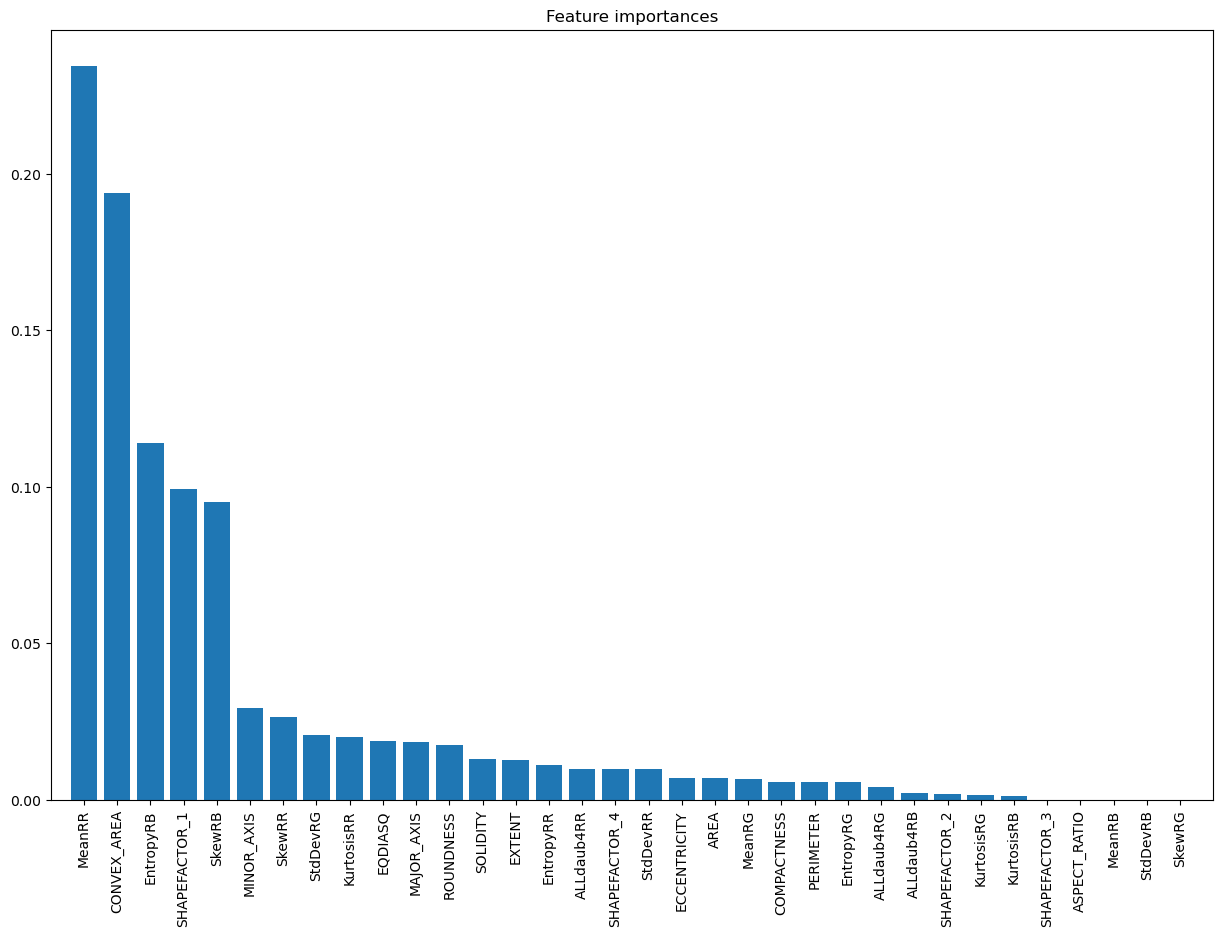

In [27]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [28]:
# Predict probabilities for each class for Decision Tree
y_prob_dt = dt_model.predict_proba(X_test.values)

# Compute AUC for each class for Decision Tree
auc_scores_dt = {}
for i in range(n_classes):
    auc_scores_dt[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_dt[:, i])

# Compute macro-averaged AUC
macro_avg_auc_dt = sum(auc_scores_dt.values()) / n_classes

# Print the results
print(f"Macro-Averaged AUC for Decision Tree: {macro_avg_auc_dt:.4f}")
for class_idx, auc_score in auc_scores_dt.items():
    print(f"{class_idx}: {auc_score:.4f}")

Macro-Averaged AUC for Decision Tree: 0.9011
AUC for class 0: 0.7381
AUC for class 1: 0.9281
AUC for class 2: 0.9562
AUC for class 3: 0.8382
AUC for class 4: 0.9502
AUC for class 5: 0.9814
AUC for class 6: 0.9156


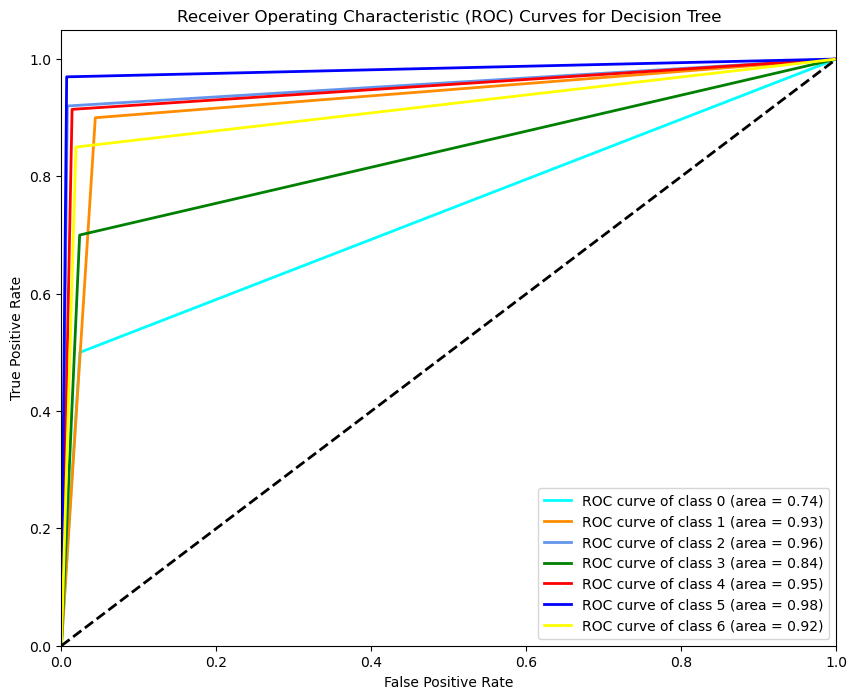

In [29]:
# Compute ROC curve and ROC area for each class for Decision Tree
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_binarized[:, i], y_prob_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot ROC curves for each class for Decision Tree
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_dt[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Metode Random Forest

Random Forest Model
Accuracy: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.90      0.75      0.82        12
      DEGLET       0.68      0.85      0.76        20
       DOKOL       1.00      0.90      0.95        50
       IRAQI       0.75      0.90      0.82        10
      ROTANA       1.00      0.97      0.99        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.81      0.85      0.83        20

    accuracy                           0.91       180
   macro avg       0.88      0.89      0.88       180
weighted avg       0.92      0.91      0.91       180

Confusion Matrix:
 [[ 9  0  0  2  0  0  1]
 [ 0 17  0  0  0  0  3]
 [ 0  5 45  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  3  0  0  0  0 17]]


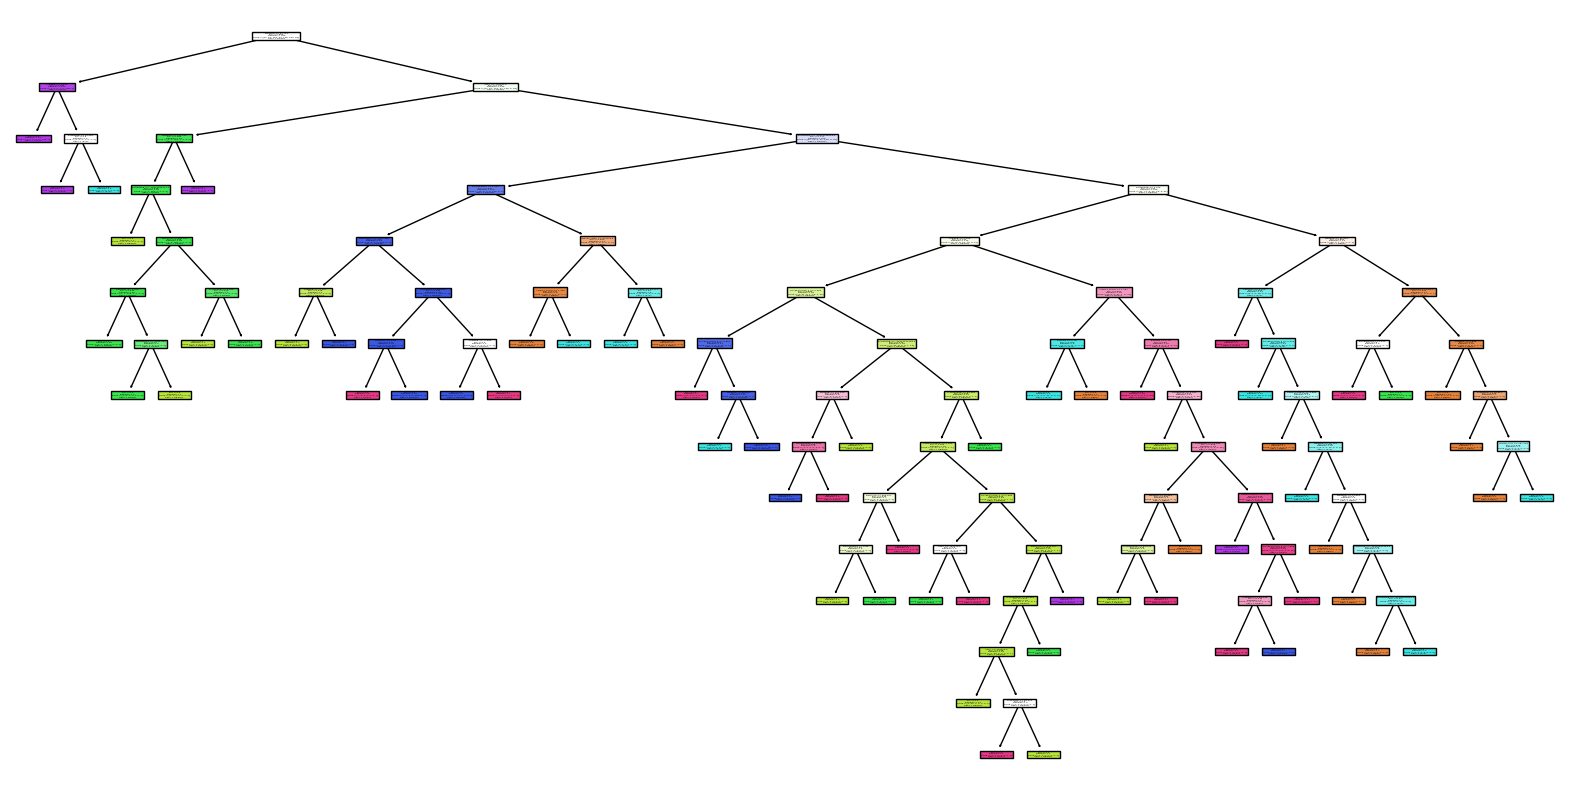

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model Random Forest
rf_model.fit(X_train.values, y_train)

# Memprediksi set pengujian
y_pred_rf = rf_model.predict(X_test.values)

# Evaluasi kinerja model Random Forest
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=nama, class_names=[str(cls) for cls in rf_model.classes_])
plt.show()

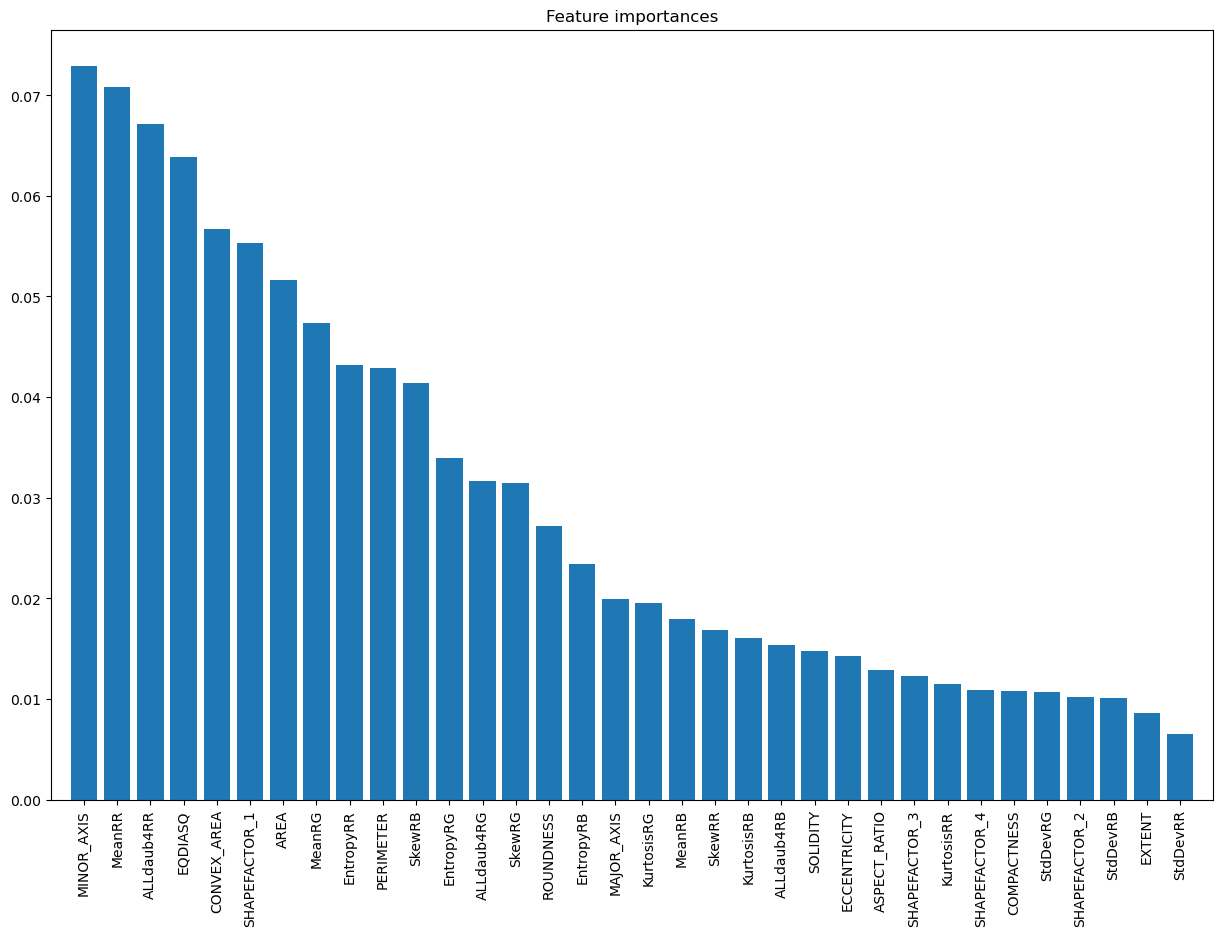

In [32]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15, 10))
plt.title("Feature importances")

plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [33]:
# Predict probabilities for each class for Random Forest
y_prob_rf = rf_model.predict_proba(X_test.values)

# Compute AUC for each class for Random Forest
auc_scores_rf = {}
for i in range(n_classes):
    auc_scores_rf[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_rf[:, i])

# Compute macro-averaged AUC
macro_avg_auc_rf = sum(auc_scores_rf.values()) / n_classes

# Print the results
print(f"Macro-Averaged AUC for Random Forest: {macro_avg_auc_rf:.4f}")
for class_idx, auc_score in auc_scores_rf.items():
    print(f"{class_idx}: {auc_score:.4f}")

Macro-Averaged AUC for Random Forest: 0.9943
AUC for class 0: 0.9978
AUC for class 1: 0.9775
AUC for class 2: 0.9990
AUC for class 3: 0.9947
AUC for class 4: 0.9997
AUC for class 5: 1.0000
AUC for class 6: 0.9911


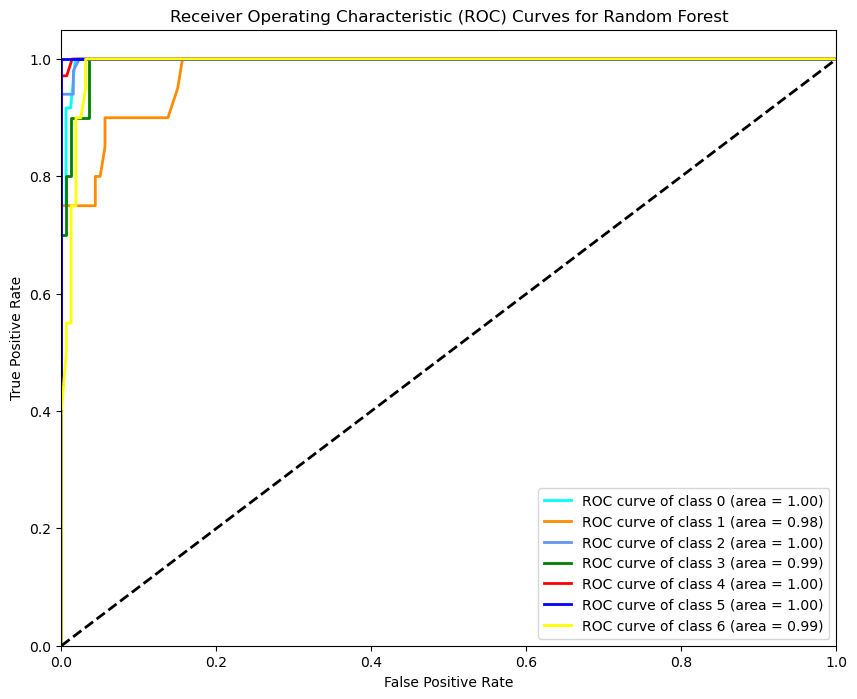

In [34]:
# Compute ROC curve and ROC area for each class for Random Forest
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.metrics import accuracy_score

# Assuming y_test, y_pred_svm, y_pred_knn, y_pred_dt, y_pred_rf are already defined
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Determine the best model
accuracies = {
    "SVM": svm_accuracy,
    "KNN": knn_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print(f"Model {best_model} memiliki kinerja lebih baik.")

SVM Accuracy: 0.6333333333333333
KNN Accuracy: 0.65
Decision Tree Accuracy: 0.8777777777777778
Random Forest Accuracy: 0.9111111111111111
Model Random Forest memiliki kinerja lebih baik.


# Analisis Model dengan dataset yang sudah di standarisasi :

## Metode SVM

In [36]:
# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Melatih model SVM
svm_model.fit(X_train_scaled, y_train)

# Memprediksi set pengujian
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluasi kinerja model SVM
print("SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Model
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

       BERHI       1.00      0.83      0.91        12
      DEGLET       0.75      0.90      0.82        20
       DOKOL       1.00      0.92      0.96        50
       IRAQI       0.83      1.00      0.91        10
      ROTANA       1.00      1.00      1.00        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.90      0.90      0.90        20

    accuracy                           0.94       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.95      0.94      0.95       180

Confusion Matrix:
 [[10  0  0  2  0  0  0]
 [ 0 18  0  0  0  0  2]
 [ 0  4 46  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  2  0  0  0  0 18]]


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict decision scores
y_decision_scores_svm = svm_model.decision_function(X_test_scaled)

# Calculate the AUC for each class
auc_svm = roc_auc_score(y_test_binarized, y_decision_scores_svm, average='macro')
print(f"Macro-Averaged AUC for SVM: {auc_svm:.4f}")

# Optionally, you can also calculate the AUC for each class separately
for i in range(y_test_binarized.shape[1]):
    auc_class = roc_auc_score(y_test_binarized[:, i], y_decision_scores_svm[:, i])
    print(f"AUC for class {i}: {auc_class:.4f}")

Macro-Averaged AUC for SVM: 0.9926
AUC for class 0: 0.9945
AUC for class 1: 0.9619
AUC for class 2: 0.9989
AUC for class 3: 0.9988
AUC for class 4: 1.0000
AUC for class 5: 1.0000
AUC for class 6: 0.9941


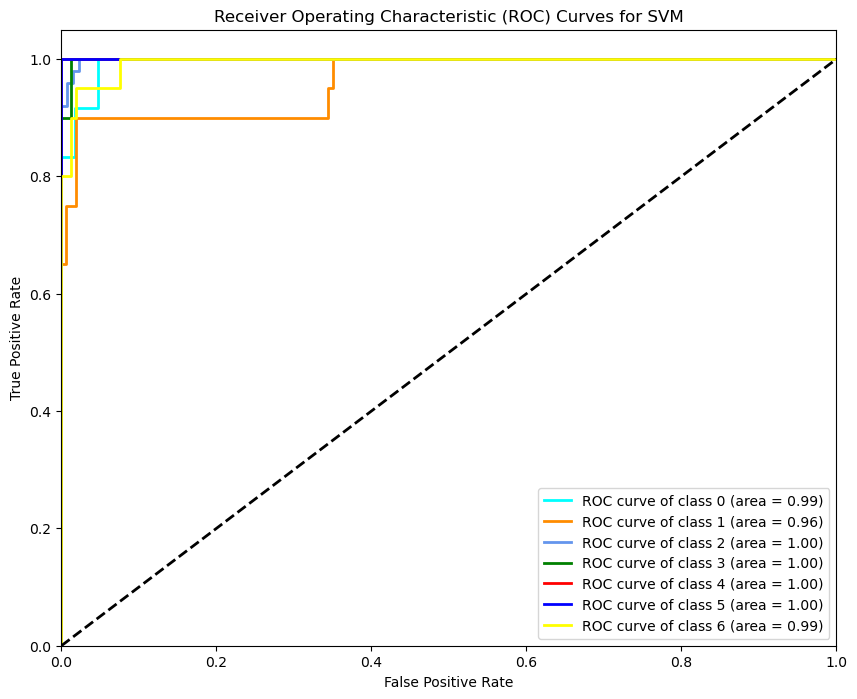

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def evaluate_and_visualize_auc(y_test, y_decision_scores, model_name):
    # Binarize the output labels for AUC calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_binarized.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
    for i, coSlor in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

# Example usage for SVM
roc_auc_svm = evaluate_and_visualize_auc(y_test, y_decision_scores_svm, model_name="SVM")

## Model KNN

In [39]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model KNN
knn_model.fit(X_train_scaled, y_train)

# Memprediksi set pengujian
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluasi kinerja model KNN
print("KNN Model")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Model
Accuracy: 0.9388888888888889
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.83      0.83      0.83        12
      DEGLET       0.76      0.95      0.84        20
       DOKOL       1.00      0.94      0.97        50
       IRAQI       0.80      0.80      0.80        10
      ROTANA       0.97      1.00      0.99        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       1.00      0.85      0.92        20

    accuracy                           0.94       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.95      0.94      0.94       180

Confusion Matrix:
 [[10  0  0  2  0  0  0]
 [ 0 19  0  0  1  0  0]
 [ 0  3 47  0  0  0  0]
 [ 2  0  0  8  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  3  0  0  0  0 17]]


In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Train the KNN model
knn_model.fit(X_train_scaled, y_train)

# Predict probabilities for each class
y_prob_knn = knn_model.predict_proba(X_test_scaled)

from sklearn.metrics import roc_auc_score

# Compute AUC for each class
auc_scores = {}
for i in range(n_classes):
    auc_scores[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_knn[:, i])

# Compute macro-averaged AUC
macro_avg_auc = sum(auc_scores.values()) / n_classes

# Print the results
print(f"Macro-Averaged AUC for KNN: {macro_avg_auc:.4f}")
for class_idx, auc_score in auc_scores.items():
    print(f"{class_idx}: {auc_score:.4f}")

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob_knn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

Macro-Averaged AUC for KNN: 0.9861
AUC for class 0: 0.9516
AUC for class 1: 0.9702
AUC for class 2: 0.9963
AUC for class 3: 0.9921
AUC for class 4: 0.9991
AUC for class 5: 1.0000
AUC for class 6: 0.9931


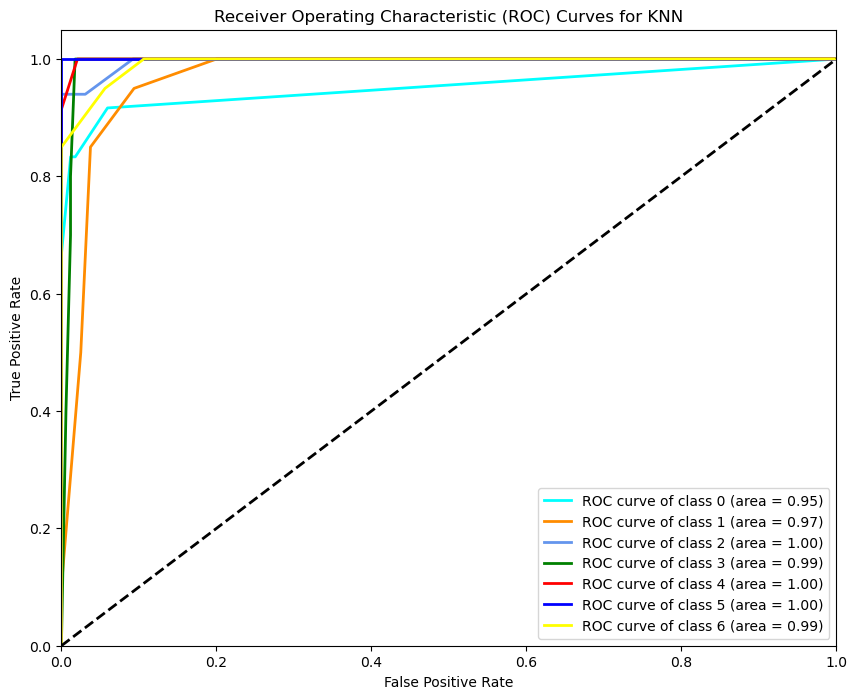

In [41]:
import matplotlib.pyplot as plt
from itertools import cycle

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for KNN')
plt.legend(loc="lower right")
plt.show()

## Metode Decision Tree

Decision Tree Model
Accuracy: 0.8777777777777778
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.60      0.50      0.55        12
      DEGLET       0.72      0.90      0.80        20
       DOKOL       0.98      0.92      0.95        50
       IRAQI       0.64      0.70      0.67        10
      ROTANA       0.94      0.91      0.93        35
      SAFAVI       0.97      0.97      0.97        33
       SOGAY       0.85      0.85      0.85        20

    accuracy                           0.88       180
   macro avg       0.81      0.82      0.82       180
weighted avg       0.88      0.88      0.88       180

Confusion Matrix:
 [[ 6  0  0  4  0  1  1]
 [ 0 18  1  0  1  0  0]
 [ 0  4 46  0  0  0  0]
 [ 2  0  0  7  1  0  0]
 [ 2  0  0  0 32  0  1]
 [ 0  0  0  0  0 32  1]
 [ 0  3  0  0  0  0 17]]


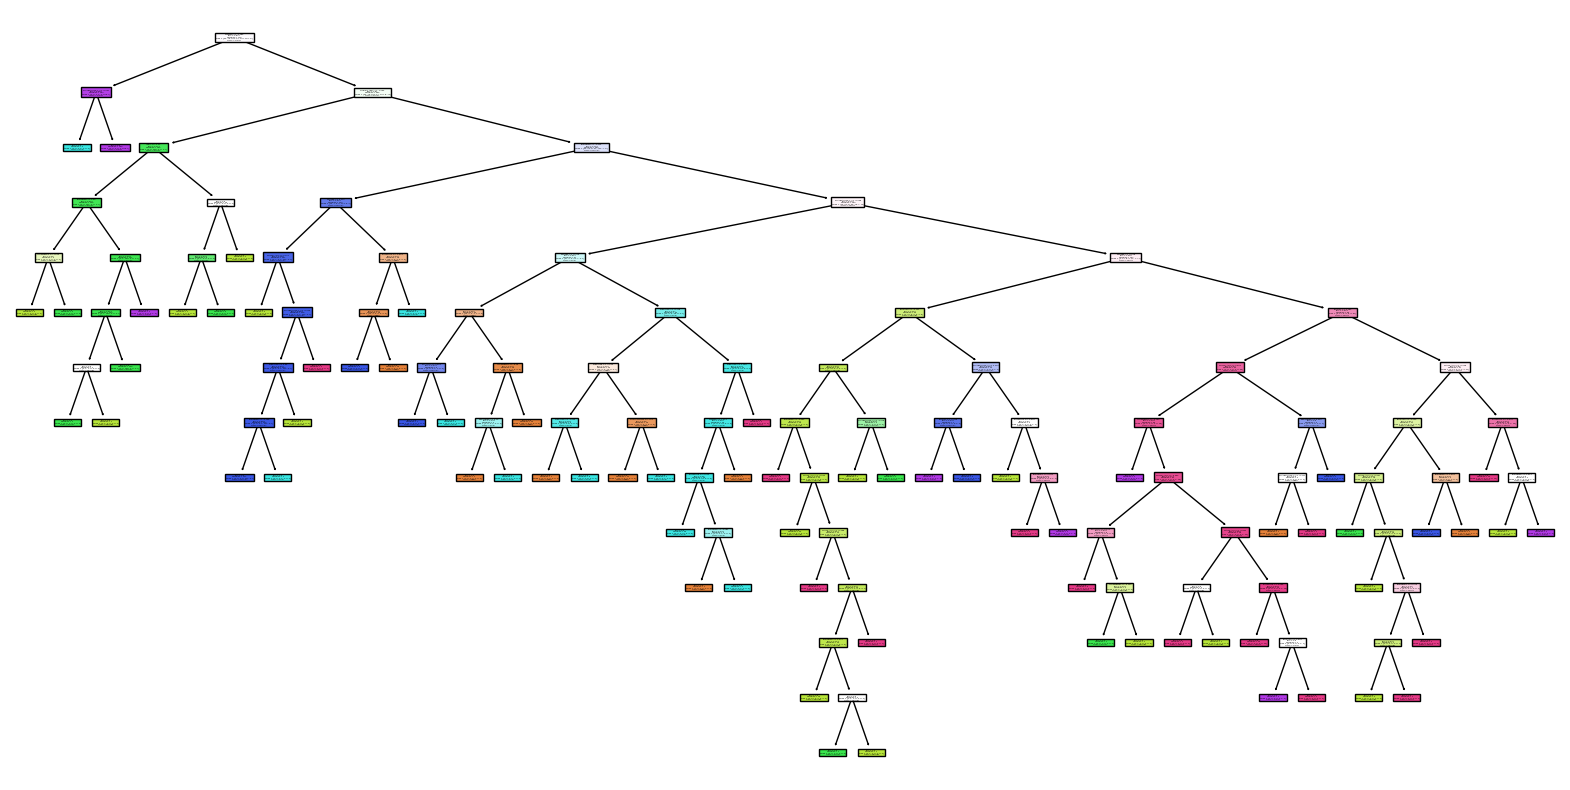

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree
dt_model.fit(scaler.fit_transform(X_train_scaled), y_train)

# Memprediksi set pengujian
y_pred_dt = dt_model.predict(scaler.transform(X_test_scaled))

# Evaluasi kinerja model Decision Tree
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

nama=X_train_scaled_df.columns.tolist()
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=nama, class_names=[str(cls) for cls in dt_model.classes_])
plt.show()

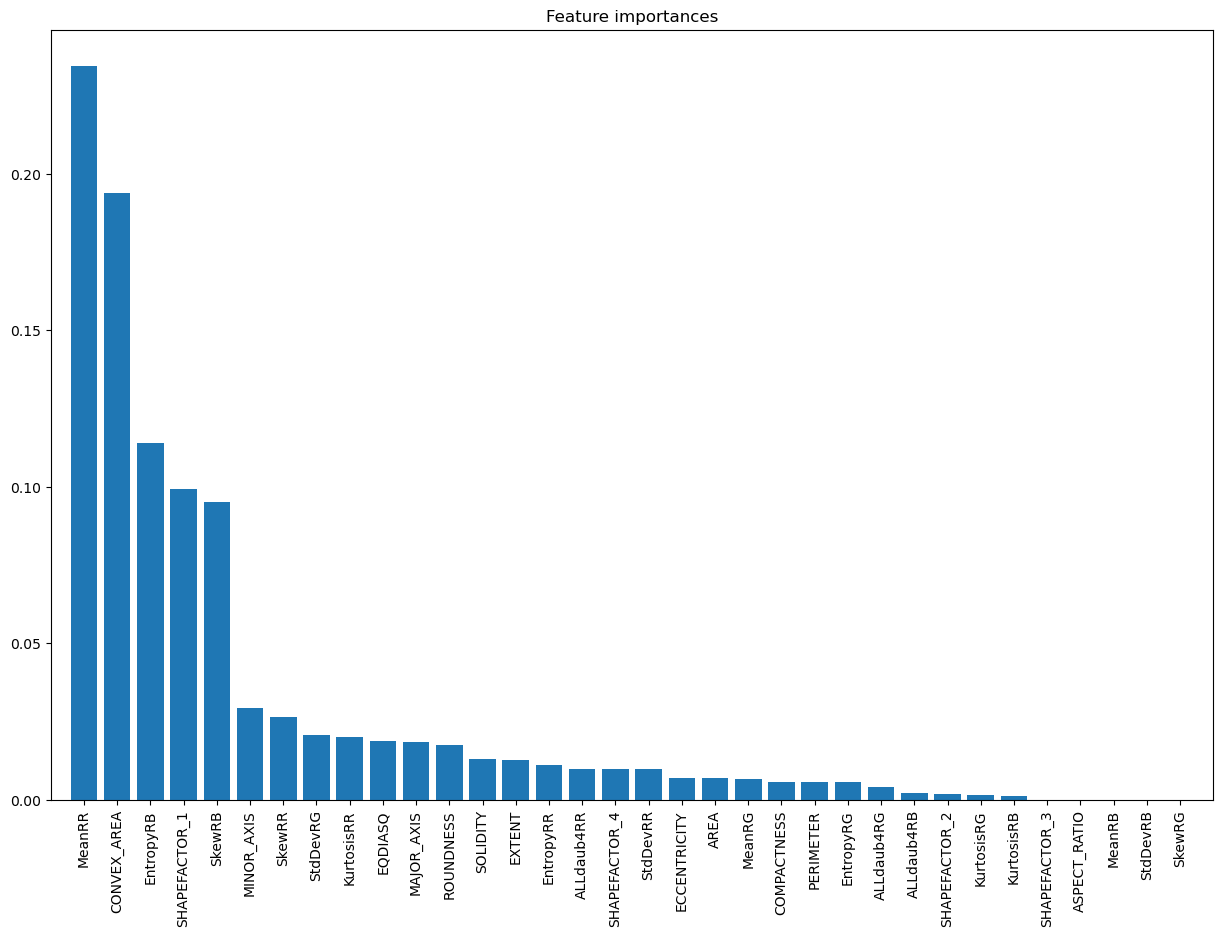

In [44]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(X_train_scaled_df.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled_df.shape[1]), X_train_scaled_df.columns[indices], rotation=90)
plt.xlim([-1, X_train_scaled_df.shape[1]])
plt.show()

In [45]:
# Compute AUC for each class for Decision Tree
auc_scores_dt = {}
for i in range(n_classes):
    auc_scores_dt[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_dt[:, i])

# Compute macro-averaged AUC
macro_avg_auc_dt = sum(auc_scores_dt.values()) / n_classes

# Print the results
print(f"Macro-Averaged AUC for Decision Tree: {macro_avg_auc_dt:.4f}")
for class_idx, auc_score in auc_scores_dt.items():
    print(f"{class_idx}: {auc_score:.4f}")

Macro-Averaged AUC for Decision Tree: 0.9011
AUC for class 0: 0.7381
AUC for class 1: 0.9281
AUC for class 2: 0.9562
AUC for class 3: 0.8382
AUC for class 4: 0.9502
AUC for class 5: 0.9814
AUC for class 6: 0.9156


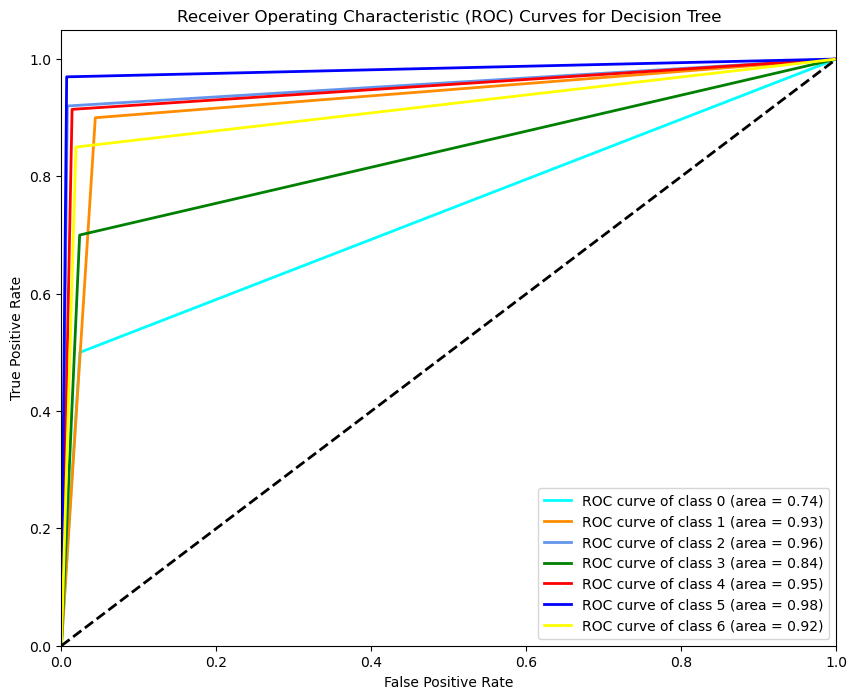

In [46]:
# Compute ROC curve and ROC area for each class for Decision Tree
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_binarized[:, i], y_prob_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot ROC curves for each class for Decision Tree
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_dt[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Metode Random Forest

Random Forest Model
Accuracy: 0.9111111111111111
Classification Report:
               precision    recall  f1-score   support

       BERHI       0.90      0.75      0.82        12
      DEGLET       0.68      0.85      0.76        20
       DOKOL       1.00      0.90      0.95        50
       IRAQI       0.75      0.90      0.82        10
      ROTANA       1.00      0.97      0.99        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.81      0.85      0.83        20

    accuracy                           0.91       180
   macro avg       0.88      0.89      0.88       180
weighted avg       0.92      0.91      0.91       180

Confusion Matrix:
 [[ 9  0  0  2  0  0  1]
 [ 0 17  0  0  0  0  3]
 [ 0  5 45  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  3  0  0  0  0 17]]


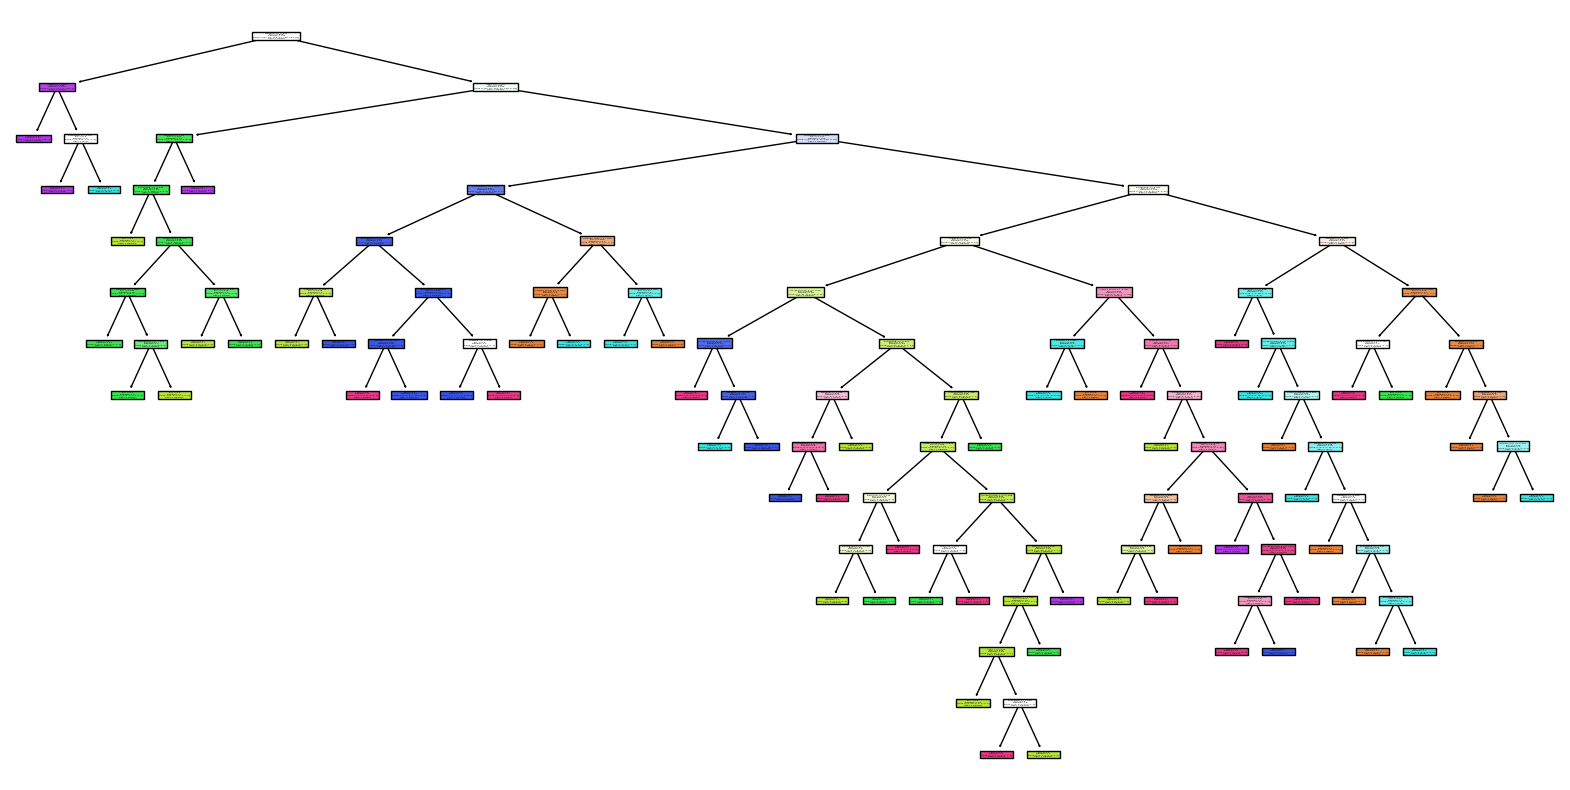

In [47]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model Random Forest
rf_model.fit(scaler.fit_transform(X_train_scaled), y_train)

# Memprediksi set pengujian
y_pred_rf = rf_model.predict(scaler.transform(X_test_scaled))

# Evaluasi kinerja model Random Forest
print("Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=nama, class_names=[str(cls) for cls in rf_model.classes_])
plt.show()

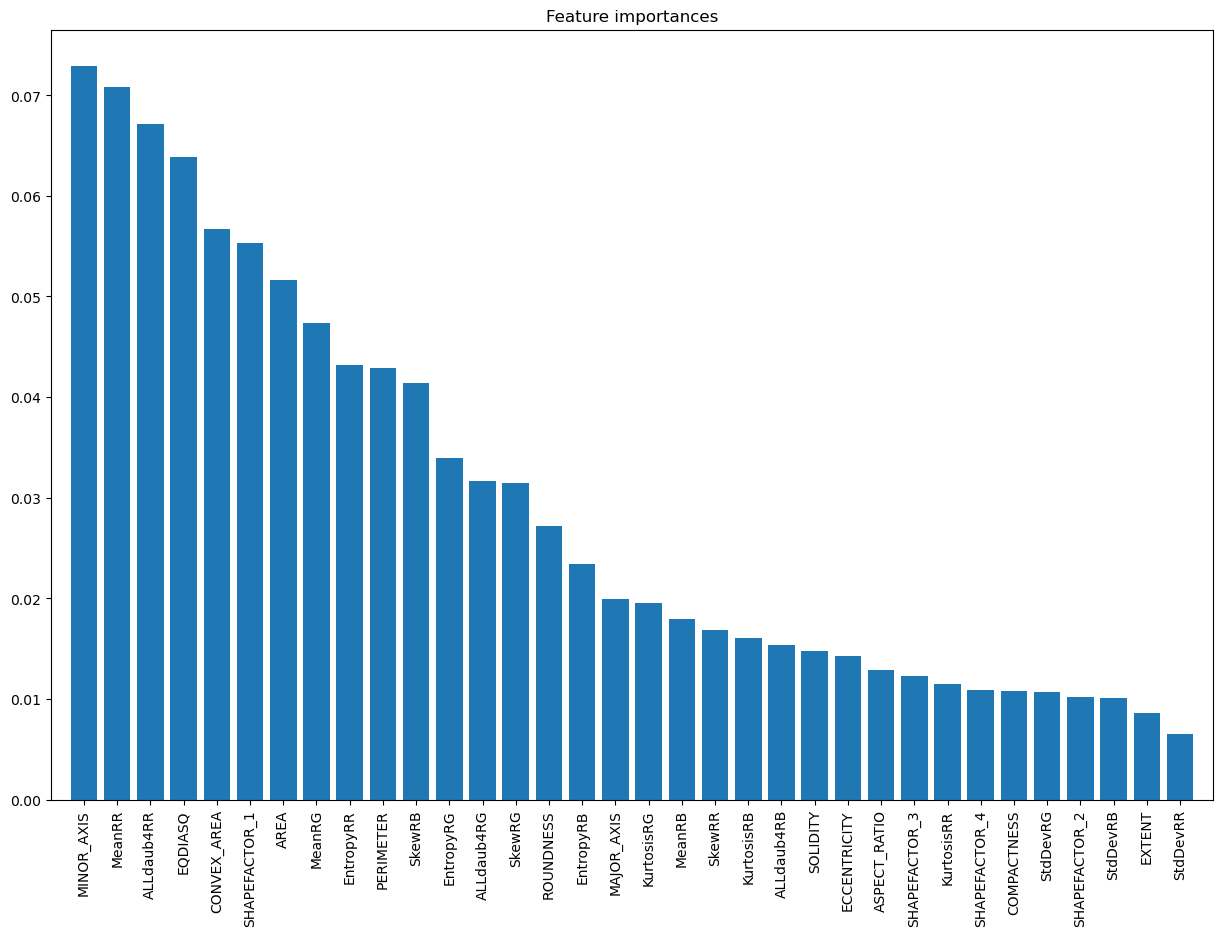

In [48]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(15, 10))
plt.title("Feature importances")

plt.bar(range(X_train_scaled_df.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled_df.shape[1]), X_train_scaled_df.columns[indices], rotation=90)
plt.xlim([-1, X_train_scaled_df.shape[1]])
plt.show()

In [49]:
# Predict probabilities for each class for Random Forest
y_prob_rf = rf_model.predict_proba(X_test.values)

# Compute AUC for each class for Random Forest
auc_scores_rf = {}
for i in range(n_classes):
    auc_scores_rf[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_rf[:, i])

# Compute macro-averaged AUC
macro_avg_auc_rf = sum(auc_scores_rf.values()) / n_classes

# Print the results
print(f"Macro-Averaged AUC for Random Forest: {macro_avg_auc_rf:.4f}")
for class_idx, auc_score in auc_scores_rf.items():
    print(f"{class_idx}: {auc_score:.4f}")

Macro-Averaged AUC for Random Forest: 0.7775
AUC for class 0: 0.9933
AUC for class 1: 0.6341
AUC for class 2: 0.6326
AUC for class 3: 0.9891
AUC for class 4: 0.6961
AUC for class 5: 0.8961
AUC for class 6: 0.6014


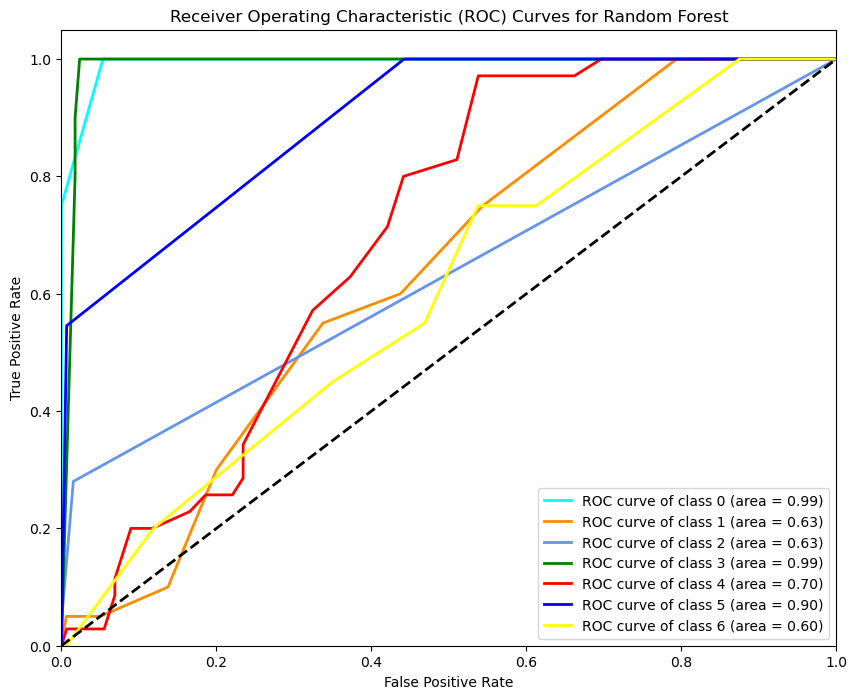

In [50]:
# Compute ROC curve and ROC area for each class for Random Forest
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

# Assuming y_test, y_pred_svm, y_pred_knn, y_pred_dt, y_pred_rf are already defined
svm_accuracy = accuracy_score(y_test, y_pred_svm)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Determine the best model
accuracies = {
    "SVM": svm_accuracy,
    "KNN": knn_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print(f"Model {best_model} memiliki kinerja lebih baik.")

SVM Accuracy: 0.9444444444444444
KNN Accuracy: 0.9388888888888889
Decision Tree Accuracy: 0.8777777777777778
Random Forest Accuracy: 0.9111111111111111
Model SVM memiliki kinerja lebih baik.


## Optimasi Parameter SVM

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Definisikan grid parameter untuk SVM dengan lebih banyak kombinasi
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Parameter regulasi
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100],  # Koefisien kernel
    'kernel': ['rbf', 'linear']  # Jenis kernel yang akan dicoba
}

# Buat model dasar SVM
svm_model = SVC(probability=True)  # Setel probability=True untuk mengaktifkan predict_proba

# Inisiasi grid search untuk model SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=3, verbose=2, scoring='accuracy')

# Fit model grid search ke data
grid_search_svm.fit(X_train_scaled, y_train)

# Lihat parameter terbaik yang ditemukan oleh GridSearchCV untuk SVM
best_parameters_svm = grid_search_svm.best_params_
print("Parameter terbaik untuk SVM:")
print(best_parameters_svm)

# Gunakan estimator terbaik untuk membuat prediksi
best_estimator_svm = grid_search_svm.best_estimator_

# Evaluasi model SVM terbaik menggunakan akurasi
test_accuracy_svm = best_estimator_svm.score(X_test_scaled, y_test)
print(f"Akurasi pada data test untuk model SVM terbaik: {test_accuracy_svm}")

# Estimator terbaik dari grid search
best_svm_model = grid_search_svm.best_estimator_

# Prediksi pada set test menggunakan model SVM terbaik
y_pred_best_svm = best_svm_model.predict(X_test_scaled)

# Buat laporan klasifikasi
classification_report_svm = classification_report(y_test, y_pred_best_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_best_svm)
accuracy_svm = accuracy_score(y_test, y_pred_best_svm)

print("Laporan Klasifikasi Model SVM Terbaik:")
print(classification_report_svm)
print("Confusion Matrix:")
print(confusion_matrix_svm)
print(f"Akurasi: {accuracy_svm}")

# Hitung AUC untuk SVM
y_pred_proba_svm = best_svm_model.predict_proba(X_test_scaled)
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_svm = roc_auc_score(y_test, y_pred_proba_svm[:, 1])
print(f"AUC dari estimator SVM terbaik: {auc_svm}")

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.2s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.1s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .................C=0.001, gamma=auto,

[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ...................C=1000, gamma=0.1, kernel=linear; total time=   0.3s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...................

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
from scipy.stats import uniform, randint
import numpy as np

# Definisikan model SVM
svm_model = SVC(probability=True)  # Setel probability=True untuk mengaktifkan predict_proba

# Definisikan ruang parameter untuk Random Search
param_grid_svm = {
    'C': uniform(0.1, 10.0),  # distribusi uniform dari 0.1 hingga 10.0 untuk parameter C
    'kernel': ['linear', 'rbf', 'poly'],  # pilihan kernel
    'gamma': ['scale', 'auto'],  # pilihan gamma
    'degree': randint(1, 10),  # distribusi uniform integer dari 1 hingga 10 untuk parameter degree (hanya untuk kernel 'poly')
}

# Inisialisasi Random Search dengan 5-fold cross-validation
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid_svm, n_iter=100,
                                       scoring='roc_auc_ovr', cv=5, random_state=42, n_jobs=-1)  # Gunakan 'roc_auc_ovr' untuk multiclass

# Lakukan pencarian parameter
random_search_svm.fit(X_train_scaled, y_train)

# Cetak parameter terbaik
print("Parameter terbaik untuk SVM:")
print(random_search_svm.best_params_)

# Evaluasi model SVM terbaik pada set test
best_svm_model = random_search_svm.best_estimator_
y_pred_best_svm = best_svm_model.predict(X_test_scaled)
y_pred_proba_svm = best_svm_model.predict_proba(X_test_scaled)

# Hitung AUC untuk SVM
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_svm = roc_auc_score(y_test, y_pred_proba_svm[:, 1])

# Akurasi
accuracy_svm = accuracy_score(y_test, y_pred_best_svm)

# Classification Report
classification_report_svm = classification_report(y_test, y_pred_best_svm)

# Confusion Matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred_best_svm)

# Output hasil
print(f"Akurasi pada data test untuk model SVM terbaik: {accuracy_svm}")
print("Laporan Klasifikasi Model SVM Terbaik:")
print(classification_report_svm)
print("Confusion Matrix:")
print(confusion_matrix_svm)
print(f"AUC dari estimator SVM terbaik: {auc_svm}")

Parameter terbaik untuk SVM:
{'C': 2.9975145291376806, 'degree': 6, 'gamma': 'auto', 'kernel': 'rbf'}
Akurasi pada data test untuk model SVM terbaik: 0.95
Laporan Klasifikasi Model SVM Terbaik:
              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        12
      DEGLET       0.75      0.90      0.82        20
       DOKOL       1.00      0.92      0.96        50
       IRAQI       0.91      1.00      0.95        10
      ROTANA       1.00      1.00      1.00        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.90      0.90      0.90        20

    accuracy                           0.95       180
   macro avg       0.94      0.95      0.94       180
weighted avg       0.96      0.95      0.95       180

Confusion Matrix:
[[11  0  0  1  0  0  0]
 [ 0 18  0  0  0  0  2]
 [ 0  4 46  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  2  0  0  0  0 18]]
AUC dari estimator SVM

## Optimasi Parameter KNN

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Define expanded parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Create KNN base model
knn_model = KNeighborsClassifier()

# Instantiate the grid search model for KNN
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn,
                               cv=3, verbose=2, scoring='roc_auc_ovr', n_jobs=-1)

# Fit the grid search model to the data
grid_search_knn.fit(X_train_scaled, y_train)

# View the best parameters found by GridSearchCV for KNN
best_parameters_knn = grid_search_knn.best_params_
print("Parameter terbaik untuk KNN:")
print(best_parameters_knn)

# Use the best estimator to make predictions
best_estimator_knn = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
y_pred_best_knn = best_estimator_knn.predict(X_test_scaled)
y_pred_proba_knn = best_estimator_knn.predict_proba(X_test_scaled)

# Calculate AUC for KNN
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn[:, 1])

# Akurasi
test_accuracy_knn = accuracy_score(y_test, y_pred_best_knn)

# Classification Report
classification_report_knn = classification_report(y_test, y_pred_best_knn)

# Confusion Matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_best_knn)

# Output hasil
print(f"Akurasi pada data test untuk model KNN terbaik: {test_accuracy_knn}")
print("Laporan Klasifikasi Model KNN Terbaik:")
print(classification_report_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)
print(f"AUC dari estimator KNN terbaik: {auc_knn}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Parameter terbaik untuk KNN:
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Akurasi pada data test untuk model KNN terbaik: 0.8944444444444445
Laporan Klasifikasi Model KNN Terbaik:
              precision    recall  f1-score   support

       BERHI       0.82      0.75      0.78        12
      DEGLET       0.67      0.80      0.73        20
       DOKOL       0.96      0.92      0.94        50
       IRAQI       0.73      0.80      0.76        10
      ROTANA       0.92      1.00      0.96        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.93      0.70      0.80        20

    accuracy                           0.89       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.90      0.89      0.89       180

Confusion Matrix:
[[ 9  0  0  3  0  0  0]
 [ 0 16  2  0  2  0  0]
 [ 0  3 46  0  0  0  1]
 [ 2  0  0  8  0  0  0]
 [ 0  0  0  0 35  0  0]
 [

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.90554291 0.90554291 0.95590947 0.95740115 0.96951064 0.9715508
 0.97624836 0.97794263 0.97651987 0.97852141 0.9777646  0.97946432
 0.98101168 0.98221777 0.98192313 0.98309687        nan 0.89242964
        nan 0.95575839        nan 0.96888699        nan 0.97385429
        nan 0.97690041        nan 0.97924222        nan 0.98159483
        nan 0.98276751 0.90554291 0.90554291 0.95590947 0.95740115
 0.96951064 0.9715508  0.97624836 0.97794263 0.97651987 0.97852141
 0.9777646  0.97946432 0.98101168 0.98221777 0.98192313 0.98309687]
  warnings.warn(


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint

# Definisikan model KNN
knn_model = KNeighborsClassifier()

# Definisikan ruang parameter untuk Random Search
param_grid_knn = {
    'n_neighbors': randint(1, 20),  # distribusi uniform integer dari 1 hingga 20 untuk jumlah tetangga
    'weights': ['uniform', 'distance'],  # pilihan weights
    'p': [1, 2],  # pilihan parameter p untuk jarak Minkowski (1: manhattan, 2: euclidean)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # pilihan algoritma
}

# Inisialisasi Random Search dengan 5-fold cross-validation
random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid_knn, n_iter=100,
                                       scoring='roc_auc_ovr', cv=5, random_state=42, n_jobs=-1)

# Lakukan pencarian parameter
random_search_knn.fit(X_train_scaled, y_train)

# Cetak parameter terbaik dan skor akurasinya
print("Parameter terbaik untuk KNN:", random_search_knn.best_params_)
print("Skor AUC terbaik untuk KNN:", random_search_knn.best_score_)

# Gunakan estimator terbaik untuk melakukan prediksi
best_estimator_knn = random_search_knn.best_estimator_

# Prediksi pada set test
y_pred_best_knn = best_estimator_knn.predict(X_test_scaled)
y_pred_proba_knn = best_estimator_knn.predict_proba(X_test_scaled)

# Hitung AUC untuk KNN
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_knn = roc_auc_score(y_test, y_pred_proba_knn[:, 1])

# Akurasi
test_accuracy_knn = accuracy_score(y_test, y_pred_best_knn)

# Classification Report
classification_report_knn = classification_report(y_test, y_pred_best_knn)

# Confusion Matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_best_knn)

# Output hasil
print(f"Akurasi pada data test untuk model KNN terbaik: {test_accuracy_knn}")
print("Laporan Klasifikasi Model KNN Terbaik:")
print(classification_report_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)
print(f"AUC dari estimator KNN terbaik: {auc_knn}")

Parameter terbaik untuk KNN: {'algorithm': 'kd_tree', 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}
Skor AUC terbaik untuk KNN: 0.9857602719875043
Akurasi pada data test untuk model KNN terbaik: 0.9222222222222223
Laporan Klasifikasi Model KNN Terbaik:
              precision    recall  f1-score   support

       BERHI       0.82      0.75      0.78        12
      DEGLET       0.81      0.85      0.83        20
       DOKOL       0.98      0.96      0.97        50
       IRAQI       0.73      0.80      0.76        10
      ROTANA       0.92      1.00      0.96        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.94      0.80      0.86        20

    accuracy                           0.92       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.92      0.92      0.92       180

Confusion Matrix:
[[ 9  0  0  3  0  0  0]
 [ 0 17  1  0  2  0  0]
 [ 0  1 48  0  0  0  1]
 [ 2  0  0  8  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0 

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.98345453 0.97871498 0.98028433 0.96996968 0.93579107 0.97705699
 0.90000557 0.97914607 0.98176572 0.98353829 0.98061505        nan
 0.97903157 0.98209115 0.93579107 0.97871498 0.98345453 0.96996968
 0.93579107 0.98176572 0.98552245 0.98176572 0.98353829 0.97837711
        nan        nan 0.98059112 0.97978766 0.97850384 0.98394654
 0.95219228 0.98024292 0.97538797 0.93709145 0.97066511        nan
 0.98061505 0.97134041 0.98230408 0.98345453 0.98059112 0.97538797
 0.96894036 0.97391597 0.96445495 0.98576027 0.98024292 0.97705699
 0.9818374  0.98161467 0.97871498        nan 0.97569726        nan
 0.97991003 0.97978766 0.98498613 0.97871498 0.97066511 0.98498613
 0.97134041 0.98576027 0.9818374  0.96315602 0.98300495 0.97291749
 0.98028433 0.8959855  0.97569726 0.96445495 0.98576027 0.97903157
 0.980279   0.97949244        nan 0.97859081 0.98

# Optimasi Parameter Decision Tree

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Definisikan grid parameter untuk Decision Tree dengan lebih banyak kombinasi
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Fungsi pengukuran kualitas split
    'splitter': ['best', 'random'],  # Strategi pembagian pada setiap node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maksimum kedalaman pohon
    'min_samples_split': [2, 5, 10, 20],  # Minimum jumlah sampel untuk membagi node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum jumlah sampel pada setiap leaf
}

# Buat model dasar Decision Tree
dt_model = DecisionTreeClassifier()

# Inisiasi grid search untuk model Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, verbose=2, scoring='accuracy')

# Fit model grid search ke data
grid_search_dt.fit(X_train_scaled, y_train)

# Lihat parameter terbaik yang ditemukan oleh GridSearchCV untuk Decision Tree
best_parameters_dt = grid_search_dt.best_params_
print("Parameter terbaik untuk Decision Tree:")
print(best_parameters_dt)

# Gunakan estimator terbaik untuk membuat prediksi
best_estimator_dt = grid_search_dt.best_estimator_

# Evaluasi model Decision Tree terbaik menggunakan akurasi
test_accuracy_dt = best_estimator_dt.score(X_test_scaled, y_test)
print(f"Akurasi pada data test untuk model Decision Tree terbaik: {test_accuracy_dt}")

# Estimator terbaik dari grid search
best_dt_model = grid_search_dt.best_estimator_

# Prediksi pada set test menggunakan model Decision Tree terbaik
y_pred_best_dt = best_dt_model.predict(X_test_scaled)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[C

[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_lea

[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5

[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=10,

[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split

[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samp

[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.1s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=40, min_samples_leaf=5, min_samples_split

[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=10

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=N

[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_sample

[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_l

[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_l

[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, mi

[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_leaf=5, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, min_samples_l

[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_sample

In [64]:
# Buat laporan klasifikasi
classification_report_dt = classification_report(y_test, y_pred_best_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_best_dt)
accuracy_dt = accuracy_score(y_test, y_pred_best_dt)

print("Laporan Klasifikasi Model Decision Tree Terbaik:")
print(classification_report_dt)
print("Confusion Matrix:")
print(confusion_matrix_dt)
print(f"Akurasi: {accuracy_dt}")

# Hitung AUC untuk Decision Tree
y_pred_proba_dt = best_dt_model.predict_proba(X_test_scaled)
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_dt = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
print(f"AUC dari estimator Decision Tree terbaik: {auc_dt}")

Laporan Klasifikasi Model Decision Tree Terbaik:
              precision    recall  f1-score   support

       BERHI       0.70      0.58      0.64        12
      DEGLET       0.73      0.80      0.76        20
       DOKOL       1.00      0.92      0.96        50
       IRAQI       0.78      0.70      0.74        10
      ROTANA       0.97      0.91      0.94        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.67      0.90      0.77        20

    accuracy                           0.88       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.89      0.88      0.89       180

Confusion Matrix:
[[ 7  0  0  2  1  0  2]
 [ 0 16  0  0  0  0  4]
 [ 0  4 46  0  0  0  0]
 [ 2  0  0  7  0  0  1]
 [ 1  0  0  0 32  0  2]
 [ 0  0  0  0  0 33  0]
 [ 0  2  0  0  0  0 18]]
Akurasi: 0.8833333333333333
AUC dari estimator Decision Tree terbaik: 0.9800207700233053


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
from scipy.stats import randint
import numpy as np

# Definisikan model Decision Tree
dt_model = DecisionTreeClassifier()

# Definisikan ruang parameter untuk Random Search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Fungsi pengukuran kualitas split
    'splitter': ['best', 'random'],  # Strategi pembagian pada setiap node
    'max_depth': randint(1, 50),  # Distribusi uniform integer dari 1 hingga 50 untuk parameter max_depth
    'min_samples_split': randint(2, 20),  # Distribusi uniform integer dari 2 hingga 20 untuk parameter min_samples_split
    'min_samples_leaf': randint(1, 20),  # Distribusi uniform integer dari 1 hingga 20 untuk parameter min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2', None],  # Opsi untuk jumlah fitur yang digunakan untuk mencari split terbaik
}

# Inisialisasi Random Search dengan 5-fold cross-validation
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_dt, n_iter=100,
                                      scoring='roc_auc_ovr', cv=5, random_state=42, n_jobs=-1)  # Gunakan 'roc_auc_ovr' untuk multiclass

# Lakukan pencarian parameter
random_search_dt.fit(X_train_scaled, y_train)

# Cetak parameter terbaik
print("Parameter terbaik untuk Decision Tree:")
print(random_search_dt.best_params_)

# Evaluasi model Decision Tree terbaik pada set test
best_dt_model = random_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test_scaled)
y_pred_proba_dt = best_dt_model.predict_proba(X_test_scaled)

# Hitung AUC untuk Decision Tree
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_dt = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])

# Akurasi
accuracy_dt = accuracy_score(y_test, y_pred_best_dt)

# Classification Report
classification_report_dt = classification_report(y_test, y_pred_best_dt)

# Confusion Matrix
confusion_matrix_dt = confusion_matrix(y_test, y_pred_best_dt)

# Output hasil
print(f"Akurasi pada data test untuk model Decision Tree terbaik: {accuracy_dt}")
print("Laporan Klasifikasi Model Decision Tree Terbaik:")
print(classification_report_dt)
print("Confusion Matrix:")
print(confusion_matrix_dt)
print(f"AUC dari estimator Decision Tree terbaik: {auc_dt}")

Parameter terbaik untuk Decision Tree:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 13, 'splitter': 'random'}
Akurasi pada data test untuk model Decision Tree terbaik: 0.8666666666666667
Laporan Klasifikasi Model Decision Tree Terbaik:
              precision    recall  f1-score   support

       BERHI       1.00      0.75      0.86        12
      DEGLET       0.76      0.65      0.70        20
       DOKOL       0.98      0.94      0.96        50
       IRAQI       0.54      0.70      0.61        10
      ROTANA       1.00      0.89      0.94        35
      SAFAVI       0.91      0.97      0.94        33
       SOGAY       0.63      0.85      0.72        20

    accuracy                           0.87       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.89      0.87      0.87       180

Confusion Matrix:
[[ 9  0  0  3  0  0  0]
 [ 0 13  1  0  0  0  6]
 [ 0  1 47  0  0  0  2]
 [ 0  0  0  7 

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\502738733\anacon

# Optimasi Parameter Random Forest

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Definisikan grid parameter untuk Random Forest dengan lebih banyak kombinasi
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  # Jumlah trees dalam forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Jumlah fitur yang dipertimbangkan untuk split terbaik
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maksimum kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum jumlah sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],  # Minimum jumlah sampel pada setiap leaf
    'bootstrap': [True, False]  # Metode bootstrap samples
}

# Buat model dasar Random Forest
rf_model = RandomForestClassifier()

# Inisiasi grid search untuk model Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, verbose=2, scoring='accuracy')

# Fit model grid search ke data
grid_search_rf.fit(X_train_scaled, y_train)

# Lihat parameter terbaik yang ditemukan oleh GridSearchCV untuk Random Forest
best_parameters_rf = grid_search_rf.best_params_
print("Parameter terbaik untuk Random Forest:")
print(best_parameters_rf)

# Gunakan estimator terbaik untuk membuat prediksi
best_estimator_rf = grid_search_rf.best_estimator_

# Evaluasi model Random Forest terbaik menggunakan akurasi
test_accuracy_rf = best_estimator_rf.score(X_test_scaled, y_test)
print(f"Akurasi pada data test untuk model Random Forest terbaik: {test_accuracy_rf}")

# Estimator terbaik dari grid search
best_rf_model = grid_search_rf.best_estimator_

# Prediksi pada set test menggunakan model Random Forest terbaik
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_esti

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_de

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   4.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_de

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   4.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   4.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth

[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_d

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featu

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, ma

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_featu

[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, max_featu

[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, ma

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, ma

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_featu

[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_fe

[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_featu

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_feat

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=30, max_featu

[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, ma

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_featu

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=40, max

[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=40, max_featu

[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=40, max_fe

[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   2.9s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.1s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=40, max_fe

[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=40, max_featu

[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, ma

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.6s
[CV] END bootstrap=True, max_depth=50, max_featu

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_featu

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, ma

[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.8s
[CV] END bootstrap=True, max_depth=50, max_featu

[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   2.3s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_featu

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV] END bootstrap=F

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, 

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.2s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, m

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=Fals

[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   2.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, m

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, m

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.6s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   4.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, m

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.6s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.3s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, m

[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, m

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=30,

[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, m

[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.6s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=40,

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, m

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.4s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=40, 

[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, m

[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.2s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, 

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   4.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   3.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=50,

[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   3.0s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, m

[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.8s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.7s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.9s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.4s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=50,

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\502738733\an

Parameter terbaik untuk Random Forest:
{'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Akurasi pada data test untuk model Random Forest terbaik: 0.9166666666666666


In [69]:
# Buat laporan klasifikasi
classification_report_rf = classification_report(y_test, y_pred_best_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)

print("Laporan Klasifikasi Model Random Forest Terbaik:")
print(classification_report_rf)
print("Confusion Matrix:")
print(confusion_matrix_rf)
print(f"Akurasi: {accuracy_rf}")

# Hitung AUC untuk Random Forest
y_pred_proba_rf = best_rf_model.predict_proba(X_test_scaled)
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])
print(f"AUC dari estimator Random Forest terbaik: {auc_rf}")

Laporan Klasifikasi Model Random Forest Terbaik:
              precision    recall  f1-score   support

       BERHI       1.00      0.67      0.80        12
      DEGLET       0.71      0.85      0.77        20
       DOKOL       1.00      0.92      0.96        50
       IRAQI       0.71      1.00      0.83        10
      ROTANA       1.00      0.97      0.99        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.81      0.85      0.83        20

    accuracy                           0.92       180
   macro avg       0.89      0.89      0.88       180
weighted avg       0.93      0.92      0.92       180

Confusion Matrix:
[[ 8  0  0  3  0  0  1]
 [ 0 17  0  0  0  0  3]
 [ 0  4 46  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  3  0  0  0  0 17]]
Akurasi: 0.9166666666666666
AUC dari estimator Random Forest terbaik: 0.9948531307748564


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
from scipy.stats import randint, uniform
import numpy as np

# Definisikan model Random Forest
rf_model = RandomForestClassifier()

# Definisikan ruang parameter untuk Random Search
param_grid_rf = {
    'n_estimators': randint(100, 1000),  # Distribusi uniform integer dari 100 hingga 1000 untuk jumlah trees
    'max_features': ['auto', 'sqrt', 'log2', None],  # Opsi untuk jumlah fitur yang digunakan untuk mencari split terbaik
    'max_depth': randint(1, 50),  # Distribusi uniform integer dari 1 hingga 50 untuk maksimum kedalaman pohon
    'min_samples_split': randint(2, 20),  # Distribusi uniform integer dari 2 hingga 20 untuk minimum jumlah sampel untuk membagi node
    'min_samples_leaf': randint(1, 20),  # Distribusi uniform integer dari 1 hingga 20 untuk minimum jumlah sampel pada setiap leaf
    'bootstrap': [True, False]  # Opsi untuk bootstrap samples
}

# Inisialisasi Random Search dengan 5-fold cross-validation
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=100,
                                      scoring='roc_auc_ovr', cv=5, random_state=42, n_jobs=-1)  # Gunakan 'roc_auc_ovr' untuk multiclass

# Lakukan pencarian parameter
random_search_rf.fit(X_train_scaled, y_train)

# Cetak parameter terbaik
print("Parameter terbaik untuk Random Forest:")
print(random_search_rf.best_params_)

# Evaluasi model Random Forest terbaik pada set test
best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_pred_proba_rf = best_rf_model.predict_proba(X_test_scaled)

# Hitung AUC untuk Random Forest
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

# Akurasi
accuracy_rf = accuracy_score(y_test, y_pred_best_rf)

# Classification Report
classification_report_rf = classification_report(y_test, y_pred_best_rf)

# Confusion Matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)

# Output hasil
print(f"Akurasi pada data test untuk model Random Forest terbaik: {accuracy_rf}")
print("Laporan Klasifikasi Model Random Forest Terbaik:")
print(classification_report_rf)
print("Confusion Matrix:")
print(confusion_matrix_rf)
print(f"AUC dari estimator Random Forest terbaik: {auc_rf}")


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\502738733\anacon

Parameter terbaik untuk Random Forest:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 559}
Akurasi pada data test untuk model Random Forest terbaik: 0.9166666666666666
Laporan Klasifikasi Model Random Forest Terbaik:
              precision    recall  f1-score   support

       BERHI       1.00      0.75      0.86        12
      DEGLET       0.68      0.85      0.76        20
       DOKOL       1.00      0.90      0.95        50
       IRAQI       0.77      1.00      0.87        10
      ROTANA       1.00      0.97      0.99        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.81      0.85      0.83        20

    accuracy                           0.92       180
   macro avg       0.89      0.90      0.89       180
weighted avg       0.93      0.92      0.92       180

Confusion Matrix:
[[ 9  0  0  2  0  0  1]
 [ 0 17  0  0  0  0  3]
 [ 0  5 45  0  0  0  0]
 [ 0  0  0 10  0  

# Metode Neural Network

In [71]:
# Mengkodekan variabel kategori
data['Class'] = data['Class'].astype('category').cat.codes

In [72]:
# Memisahkan fitur (X) dan label (y)
X = data.drop('Class', axis=1).values  # Pastikan X adalah numpy array
y = data['Class'].values  # Pastikan y adalah numpy array

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Binarize the output labels for Neural Network
n_classes = len(np.unique(y))  # Pastikan ini sudah benar
y_train_nn = to_categorical(y_train, num_classes=n_classes)
y_test_nn = to_categorical(y_test, num_classes=n_classes)

In [74]:
# Inisialisasi model Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(n_classes, activation='softmax'))

C:\Users\502738733\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
# Kompilasi model Neural Network
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# Melatih model Neural Network
history = nn_model.fit(X_train, y_train_nn, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2025 - loss: 1753746176.0000 - val_accuracy: 0.3542 - val_loss: 241969696.0000
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3493 - loss: 224523248.0000 - val_accuracy: 0.2847 - val_loss: 419465632.0000
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4294 - loss: 224119920.0000 - val_accuracy: 0.3889 - val_loss: 245737568.0000
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 136622416.0000 - val_accuracy: 0.3125 - val_loss: 172650544.0000
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3687 - loss: 199665744.0000 - val_accuracy: 0.3403 - val_loss: 304376384.0000
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3686 - loss: 250080032.0000 - val_accuracy: 0.2222 - val_loss: 379016384.0000
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 245272736.0000 - val_accuracy: 0.5139 - val_loss: 216368848.0000
Epoch

In [77]:
# Memprediksi set pengujian
y_prob_nn = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_prob_nn, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [78]:
# Evaluasi kinerja model Neural Network
print("Neural Network Model")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Model
Accuracy: 0.37222222222222223
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        20
           2       0.91      0.20      0.33        50
           3       0.21      0.50      0.29        10
           4       0.31      0.34      0.32        35
           5       1.00      0.64      0.78        33
           6       0.22      0.95      0.36        20

    accuracy                           0.37       180
   macro avg       0.38      0.38      0.30       180
weighted avg       0.53      0.37      0.35       180

Confusion Matrix:
 [[ 0  0  0  5  3  0  4]
 [ 0  0  0  0  5  0 15]
 [ 0  0 10  4 14  0 22]
 [ 0  0  0  5  3  0  2]
 [ 0  0  0  1 12  0 22]
 [ 0  0  1  9  1 21  1]
 [ 0  0  0  0  1  0 19]]


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# Binarize the output labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute AUC for each class for Neural Network
auc_scores_nn = {}
for i in range(n_classes):
    auc_scores_nn[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_nn[:, i])

In [80]:
# Compute macro-averaged AUC
macro_avg_auc_nn = sum(auc_scores_nn.values()) / n_classes

In [81]:
# Print the results
print(f"Macro-Averaged AUC for Neural Network: {macro_avg_auc_nn:.4f}")
for class_idx, auc_score in auc_scores_nn.items():
    print(f"{class_idx}: {auc_score:.4f}")

Macro-Averaged AUC for Neural Network: 0.6365
AUC for class 0: 0.5000
AUC for class 1: 0.5000
AUC for class 2: 0.5962
AUC for class 3: 0.6941
AUC for class 4: 0.5783
AUC for class 5: 0.8182
AUC for class 6: 0.7688


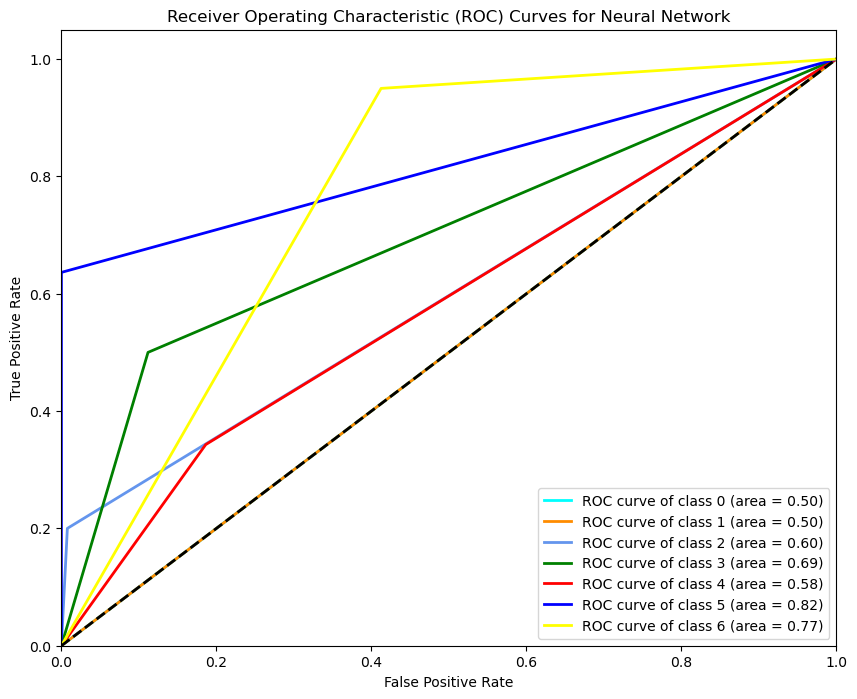

In [82]:
# Compute ROC curve and ROC area for each class for Neural Network
fpr_nn = dict()
tpr_nn = dict()
roc_auc_nn = dict()
for i in range(n_classes):
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_binarized[:, i], y_prob_nn[:, i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

# Plot ROC curves for each class for Neural Network
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_nn[i], tpr_nn[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_nn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Neural Network')
plt.legend(loc="lower right")
plt.show()

## Data Sudah terstandarisasi

In [83]:
# Inisialisasi model Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(n_classes, activation='softmax'))

C:\Users\502738733\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# Kompilasi model Neural Network
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
# Melatih model Neural Network
history = nn_model.fit(X_train_scaled, y_train_nn, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5259 - loss: 1.3416 - val_accuracy: 0.7569 - val_loss: 0.7015
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7698 - loss: 0.6388 - val_accuracy: 0.8472 - val_loss: 0.4540
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.4219 - val_accuracy: 0.8333 - val_loss: 0.3906
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8974 - loss: 0.3143 - val_accuracy: 0.8681 - val_loss: 0.3299
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9171 - loss: 0.2542 - val_accuracy: 0.8750 - val_loss: 0.3137
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9047 - loss: 0.2573 - val_accuracy: 0.8889 - val_loss: 0.2884
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9200 - loss: 0.2464 - val_accuracy: 0.8958 - val_loss: 0.2816
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.2103 - val_accuracy: 0.9097 - val_loss:

In [86]:
# Memprediksi set pengujian
y_prob_nn = nn_model.predict(X_test_scaled)
y_pred_nn = np.argmax(y_prob_nn, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [87]:
# Evaluasi kinerja model Neural Network
print("Neural Network Model")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network Model
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.89      0.80      0.84        20
           2       0.98      0.96      0.97        50
           3       0.80      0.80      0.80        10
           4       0.94      0.97      0.96        35
           5       1.00      1.00      1.00        33
           6       0.91      1.00      0.95        20

    accuracy                           0.94       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.94      0.94      0.94       180

Confusion Matrix:
 [[11  0  0  1  0  0  0]
 [ 0 16  1  0  2  0  1]
 [ 0  2 48  0  0  0  0]
 [ 1  0  0  8  0  0  1]
 [ 0  0  0  1 34  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0 20]]


In [88]:
# Binarize the output labels for AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Compute AUC for each class for Neural Network
auc_scores_nn = {}
for i in range(n_classes):
    auc_scores_nn[f'AUC for class {i}'] = roc_auc_score(y_test_binarized[:, i], y_prob_nn[:, i])

In [89]:
# Compute macro-averaged AUC
macro_avg_auc_nn = sum(auc_scores_nn.values()) / n_classes

In [90]:
# Print the results
print(f"Macro-Averaged AUC for Neural Network: {macro_avg_auc_nn:.4f}")
for class_idx, auc_score in auc_scores_nn.items():
    print(f"{class_idx}: {auc_score:.4f}")

Macro-Averaged AUC for Neural Network: 0.9960
AUC for class 0: 0.9975
AUC for class 1: 0.9822
AUC for class 2: 0.9989
AUC for class 3: 0.9971
AUC for class 4: 0.9984
AUC for class 5: 1.0000
AUC for class 6: 0.9981


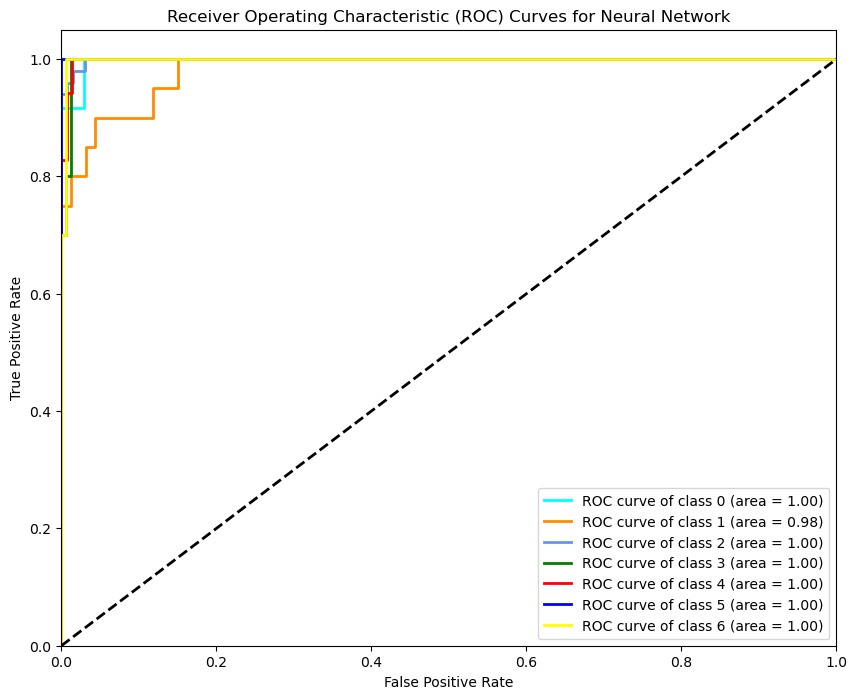

In [91]:
# Compute ROC curve and ROC area for each class for Neural Network
fpr_nn = dict()
tpr_nn = dict()
roc_auc_nn = dict()
for i in range(n_classes):
    fpr_nn[i], tpr_nn[i], _ = roc_curve(y_test_binarized[:, i], y_prob_nn[:, i])
    roc_auc_nn[i] = auc(fpr_nn[i], tpr_nn[i])

# Plot ROC curves for each class for Neural Network
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_nn[i], tpr_nn[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_nn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Neural Network')
plt.legend(loc="lower right")
plt.show()

## Optimasi Parameter NN

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

# Definisikan grid parameter untuk Neural Network dengan lebih banyak kombinasi
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],  # Ukuran layer tersembunyi
    'activation': ['tanh', 'relu'],  # Fungsi aktivasi untuk layer tersembunyi
    'solver': ['sgd', 'adam'],  # Solver untuk mengoptimalkan bobot
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Parameter regularisasi L2
    'learning_rate': ['constant', 'adaptive'],  # Penjadwalan learning rate
}

# Buat model dasar Neural Network
nn_model = MLPClassifier(max_iter=1000)  # Tetapkan iterasi maksimum agar cukup besar

# Inisiasi grid search untuk model Neural Network
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn, cv=3, verbose=2, scoring='accuracy')

# Fit model grid search ke data
grid_search_nn.fit(X_train_scaled, y_train)

# Lihat parameter terbaik yang ditemukan oleh GridSearchCV untuk Neural Network
best_parameters_nn = grid_search_nn.best_params_
print("Parameter terbaik untuk Neural Network:")
print(best_parameters_nn)

# Gunakan estimator terbaik untuk membuat prediksi
best_estimator_nn = grid_search_nn.best_estimator_

# Evaluasi model Neural Network terbaik menggunakan akurasi
test_accuracy_nn = best_estimator_nn.score(X_test_scaled, y_test)
print(f"Akurasi pada data test untuk model Neural Network terbaik: {test_accuracy_nn}")

# Estimator terbaik dari grid search
best_nn_model = grid_search_nn.best_estimator_

# Prediksi pada set test menggunakan model Neural Network terbaik
y_pred_best_nn = best_nn_model.predict(X_test_scaled)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   3.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.4s
[CV] END activation=

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   8.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   6.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=  15.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   7.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   3.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   4.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   3.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   7.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   3.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   7.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   8.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   4.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   3.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.01, hi

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   3.6s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   5.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   6.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.4s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   3.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   3.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   3.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.7s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   3.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   3.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.6s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.3s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   4.1s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   4.7s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   3.2s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   7.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   6.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   3.5s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   5.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.4s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   6.0s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   3.6s
[CV] END activat

C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.7s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=tanh, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   4.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   3.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   3.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   1.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   6.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   1.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   2.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   1.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.4s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   6.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   4.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   7.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   4.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   4.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   5.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   4.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   4.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   5.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   5.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.9s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   1.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   1.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   3.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.6s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   1.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   2.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   3.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   1.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.7s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   2.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd; total time=   3.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.2s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam; total time=   2.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   4.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   3.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   2.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   4.3s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   3.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   1.9s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   5.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=sgd; total time=   4.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, solver=adam; total time=   3.8s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=sgd; total time=   4.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   3.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, solver=adam; total time=   2.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.0s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   6.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=sgd; total time=   5.1s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   2.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=constant, solver=adam; total time=   4.5s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.1s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   5.2s


C:\Users\502738733\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=sgd; total time=   6.3s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   3.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   2.9s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=   3.2s
Parameter terbaik untuk Neural Network:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Akurasi pada data test untuk model Neural Network terbaik: 0.95


In [93]:
# Buat laporan klasifikasi
classification_report_nn = classification_report(y_test, y_pred_best_nn)
confusion_matrix_nn = confusion_matrix(y_test, y_pred_best_nn)
accuracy_nn = accuracy_score(y_test, y_pred_best_nn)

print("Laporan Klasifikasi Model Neural Network Terbaik:")
print(classification_report_nn)
print("Confusion Matrix:")
print(confusion_matrix_nn)
print(f"Akurasi: {accuracy_nn}")

# Hitung AUC untuk Neural Network
y_pred_proba_nn = best_nn_model.predict_proba(X_test_scaled)
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_nn = roc_auc_score(y_test, y_pred_proba_nn, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])
print(f"AUC dari estimator Neural Network terbaik: {auc_nn}")

Laporan Klasifikasi Model Neural Network Terbaik:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.81      0.85      0.83        20
           2       0.98      0.98      0.98        50
           3       0.90      0.90      0.90        10
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        33
           6       0.89      0.85      0.87        20

    accuracy                           0.95       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.95      0.95      0.95       180

Confusion Matrix:
[[11  0  0  1  0  0  0]
 [ 0 17  1  0  0  0  2]
 [ 0  1 49  0  0  0  0]
 [ 1  0  0  9  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  0 33  0]
 [ 0  3  0  0  0  0 17]]
Akurasi: 0.95
AUC dari estimator Neural Network terbaik: 0.9956774466196736


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
from scipy.stats import randint, uniform
import numpy as np

# Definisikan model Neural Network
nn_model = MLPClassifier(max_iter=1000)  # Tetapkan iterasi maksimum agar cukup besar

# Definisikan ruang parameter untuk Random Search
param_grid_nn = {
    'hidden_layer_sizes': [(randint.rvs(50, 200),) for _ in range(10)],  # Ukuran layer tersembunyi acak antara 50 dan 200
    'activation': ['tanh', 'relu'],  # Fungsi aktivasi untuk layer tersembunyi
    'solver': ['sgd', 'adam'],  # Solver untuk mengoptimalkan bobot
    'alpha': uniform(0.0001, 0.1),  # Parameter regularisasi L2
    'learning_rate': ['constant', 'adaptive'],  # Penjadwalan learning rate
}

# Inisialisasi Random Search dengan 5-fold cross-validation
random_search_nn = RandomizedSearchCV(estimator=nn_model, param_distributions=param_grid_nn, n_iter=100,
                                      scoring='roc_auc_ovr', cv=5, random_state=42, n_jobs=-1)  # Gunakan 'roc_auc_ovr' untuk multiclass

# Lakukan pencarian parameter
random_search_nn.fit(X_train_scaled, y_train)

# Cetak parameter terbaik
print("Parameter terbaik untuk Neural Network:")
print(random_search_nn.best_params_)

# Evaluasi model Neural Network terbaik pada set test
best_nn_model = random_search_nn.best_estimator_
y_pred_best_nn = best_nn_model.predict(X_test_scaled)
y_pred_proba_nn = best_nn_model.predict_proba(X_test_scaled)

# Hitung AUC untuk Neural Network
if len(np.unique(y_train)) > 2:  # Kasus multiclass
    auc_nn = roc_auc_score(y_test, y_pred_proba_nn, multi_class='ovr')  # Gunakan 'ovr' untuk multiclass
else:  # Kasus binary
    auc_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])

# Akurasi
accuracy_nn = accuracy_score(y_test, y_pred_best_nn)

# Classification Report
classification_report_nn = classification_report(y_test, y_pred_best_nn)

# Confusion Matrix
confusion_matrix_nn = confusion_matrix(y_test, y_pred_best_nn)

# Output hasil
print(f"Akurasi pada data test untuk model Neural Network terbaik: {accuracy_nn}")
print("Laporan Klasifikasi Model Neural Network Terbaik:")
print(classification_report_nn)
print("Confusion Matrix:")
print(confusion_matrix_nn)
print(f"AUC dari estimator Neural Network terbaik: {auc_nn}")

Parameter terbaik untuk Neural Network:
{'activation': 'tanh', 'alpha': 0.018751851039985425, 'hidden_layer_sizes': (93,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Akurasi pada data test untuk model Neural Network terbaik: 0.9666666666666667
Laporan Klasifikasi Model Neural Network Terbaik:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      0.85      0.87        20
           2       0.98      0.96      0.97        50
           3       0.91      1.00      0.95        10
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        33
           6       0.95      1.00      0.98        20

    accuracy                           0.97       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.97      0.97      0.97       180

Confusion Matrix:
[[11  0  0  1  0  0  0]
 [ 0 17  1  0  1  0  1]
 [ 0  2 48  0  0  0  0]
 [ 0  0  0 10  